In [153]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import re
import seaborn as sns
import missingno as msno
from statsmodels.formula.api import ols
from statsmodels.api import qqplot
from distinctipy import distinctipy

In [154]:
# Chargement des données
ins_prof_dut = pd.read_csv("../csv/fr-esr-insertion_professionnelle-dut_donnees_nationales.csv", sep=";")
ins_prof_lp = pd.read_csv("../csv//fr-esr-insertion_professionnelle-lp_donnees_nationales.csv", sep=";")
ins_prof_master = pd.read_csv("../csv/fr-esr-insertion_professionnelle-master_donnees_nationales.csv", sep=";")

In [155]:
ins_prof_dut.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1128 entries, 0 to 1127
Data columns (total 75 columns):
 #   Column                                                                 Non-Null Count  Dtype  
---  ------                                                                 --------------  -----  
 0   Année                                                                  1128 non-null   object 
 1   Diplôme                                                                1128 non-null   object 
 2   situation                                                              1128 non-null   object 
 3   Genre                                                                  1128 non-null   object 
 4   Disciplines                                                            1128 non-null   object 
 5   Code du domaine                                                        1128 non-null   object 
 6   Domaine                                                                1128 non-null   o

In [156]:
ins_prof_lp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1867 entries, 0 to 1866
Data columns (total 75 columns):
 #   Column                                                                 Non-Null Count  Dtype  
---  ------                                                                 --------------  -----  
 0   Année                                                                  1867 non-null   object 
 1   Diplôme                                                                1867 non-null   object 
 2   situation                                                              1867 non-null   object 
 3   Genre                                                                  1867 non-null   object 
 4   Disciplines                                                            1867 non-null   object 
 5   Code du domaine                                                        1867 non-null   object 
 6   Domaine                                                                1867 non-null   o

In [157]:
ins_prof_master.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2925 entries, 0 to 2924
Data columns (total 75 columns):
 #   Column                                                                 Non-Null Count  Dtype  
---  ------                                                                 --------------  -----  
 0   Année                                                                  2925 non-null   int64  
 1   Diplôme                                                                2925 non-null   object 
 2   situation                                                              2925 non-null   object 
 3   Genre                                                                  2925 non-null   object 
 4   Disciplines                                                            2925 non-null   object 
 5   Code du domaine                                                        2925 non-null   object 
 6   Domaine                                                                2925 non-null   o

Etude de l'insertion professonnelle des DUT, licences pro et Master 

In [158]:
# Agrégation de toutes les formations (DUT, LP, MASTER)
ins_prof = pd.concat([ins_prof_dut, ins_prof_lp, ins_prof_master], keys=["D", "L", "M"])

In [159]:
ins_prof.head()

Année Diplôme                 situation             Genre  \
D 0  2013     DUT  30 mois après le diplôme            hommes   
  1  2017     DUT  18 mois après le diplôme  femmes et hommes   
  2  2017     DUT  18 mois après le diplôme            hommes   
  3  2017     DUT  18 mois après le diplôme  femmes et hommes   
  4  2017     DUT  18 mois après le diplôme            femmes   

                                           Disciplines Code du domaine  \
D 0  Droit, économie et gestion>Droit>Carrières jur...             DEG   
  1  Sciences, technologies et santé>Informatique>I...             STS   
  2  Sciences, technologies et santé>Informatique>I...             STS   
  3  Sciences humaines et sociales>Information comm...             SHS   
  4  Sciences humaines et sociales>Information comm...             SHS   

                             Domaine Code de la discipline  \
D 0       Droit, économie et gestion                disc02   
  1  Sciences, technologies et santé                disc16   
  2  Sciences, technologies et santé                disc16   
  3    Sciences humaines et sociales                disc10   
  4    Sciences humaines et sociales                disc10   

                    Discipline Sigle  ... Secteur disciplinaire  \
D 0                      Droit   NaN  ...                   NaN   
  1               Informatique   NaN  ...                   NaN   
  2               Informatique   NaN  ...                   NaN   
  3  Information communication   NaN  ...                   NaN   
  4  Information communication   NaN  ...                   NaN   

     Administration publique (hors ens.)  \
D 0                                  NaN   
  1                                  NaN   
  2                                  NaN   
  3                                  NaN   
  4                                  NaN   

    Prof. libérale, indépendant, chef d’entreprise  \
D 0                                            NaN   
  1                                            NaN   
  2                                            NaN   
  3                                            NaN   
  4                                            NaN   

    Contrat de professionnalisation  \
D 0                             NaN   
  1                             NaN   
  2                             NaN   
  3                             NaN   
  4                             NaN   

    La fonction publique (d'etat, territoriale ou hospitalière)  \
D 0                                                NaN            
  1                                                NaN            
  2                                                NaN            
  3                                                NaN            
  4                                                NaN            

    Organisation internationale ou une institution de l'Union européenne  \
D 0                                                NaN                     
  1                                                NaN                     
  2                                                NaN                     
  3                                                NaN                     
  4                                                NaN                     

    Société d'économie mixte Agriculture, sylviculture et pêche  \
D 0                      NaN                                NaN   
  1                      NaN                                NaN   
  2                      NaN                                NaN   
  3                      NaN                                NaN   
  4                      NaN                                NaN   

    Artisan, commerçant, chef d'entreprise  \
D 0                                    NaN   
  1                                    NaN   
  2                                    NaN   
  3                                    NaN   
  4                                    NaN   

    Ingénieur, cadre, prof.

In [160]:
ins_prof.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 5920 entries, ('D', 0) to ('M', 2924)
Data columns (total 86 columns):
 #   Column                                                                 Non-Null Count  Dtype  
---  ------                                                                 --------------  -----  
 0   Année                                                                  5920 non-null   object 
 1   Diplôme                                                                5920 non-null   object 
 2   situation                                                              5920 non-null   object 
 3   Genre                                                                  5920 non-null   object 
 4   Disciplines                                                            5920 non-null   object 
 5   Code du domaine                                                        5920 non-null   object 
 6   Domaine                                                                592

Les variables de 75 à 85 sont à corriger car elles sont en supplément des 3 datasets d'origine.

In [161]:
# Correction des noms des variables en DUT et LP en comparaison des Masters
ins_prof_dut.rename(columns=
    {
        "Sigle": "Code du secteur disciplinaire",
        "Spécialité": "Secteur disciplinaire",
        "Ingénieur', cadre, prof. libérales, prof. intellectuelles sup": "Ingénieur, cadre, prof. libérales, prof. intellectuelles sup",
        "Artisan, commerçant,' chef d''entreprise": "Artisan, commerçant, chef d'entreprise",
        "Administra tion publique (hors ens.)": "Administration publique (hors ens.)",
        "Prof. libérale, indépendant,' chef d’entreprise": "Prof. libérale, indépendant, chef d’entreprise",
        "Contrat de professionnalisa tion": "Contrat de professionnalisation",
        "La fonction publique (d''etat',' territoriale ou hospitalière)": "La fonction publique (d'etat, territoriale ou hospitalière)",
        "Organisation internationale ou une institution de l''Union européenne": "Organisation internationale ou une institution de l'Union européenne",
        "Société d''économie mixte": "Société d'économie mixte",
        "Agriculture', sylviculture et pêche": "Agriculture, sylviculture et pêche"
    }, inplace=True
)

ins_prof_lp.rename(columns=
    {
        "Ingénieur', cadre, prof. libérales, prof. intellectuelles sup": "Ingénieur, cadre, prof. libérales, prof. intellectuelles sup",
        "Artisan, commerçant,' chef d''entreprise": "Artisan, commerçant, chef d'entreprise",
        "Administra tion publique (hors ens.)": "Administration publique (hors ens.)",
        "Prof. libérale, indépendant,' chef d’entreprise": "Prof. libérale, indépendant, chef d’entreprise",
        "Contrat de professionnalisa tion": "Contrat de professionnalisation",
        "La fonction publique (d''etat',' territoriale ou hospitalière)": "La fonction publique (d'etat, territoriale ou hospitalière)",
        "Organisation internationale ou une institution de l''Union européenne": "Organisation internationale ou une institution de l'Union européenne",
        "Société d''économie mixte": "Société d'économie mixte",
        "Agriculture', sylviculture et pêche": "Agriculture, sylviculture et pêche"
    }, inplace = True
)

In [162]:
# Nouvelle concaténation avec les datasets corrigés 
ins_prof = pd.concat([ins_prof_dut, ins_prof_lp, ins_prof_master], keys=["D", "L", "M"])

In [163]:
ins_prof.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 5920 entries, ('D', 0) to ('M', 2924)
Data columns (total 75 columns):
 #   Column                                                                 Non-Null Count  Dtype  
---  ------                                                                 --------------  -----  
 0   Année                                                                  5920 non-null   object 
 1   Diplôme                                                                5920 non-null   object 
 2   situation                                                              5920 non-null   object 
 3   Genre                                                                  5920 non-null   object 
 4   Disciplines                                                            5920 non-null   object 
 5   Code du domaine                                                        5920 non-null   object 
 6   Domaine                                                                592

In [164]:
ins_prof["Discipline"].unique()

array(['Droit', 'Informatique', 'Information communication',
       'Sciences fondamentales', 'Gestion',
       'Autres formations juridiques, économiques et de gestion',
       'Autres sciences humaines et sociales', "Sciences de l''ingénieur",
       "Ensemble des départements d''IUT",
       'Ensemble formations juridiques, économiques et de gestion',
       'Ensemble sciences humaines et sociales',
       'Ensemble sciences, technologies et santé',
       'Sciences de la vie et de la terre', 'Lettres, langues, arts',
       'Histoire-géographie', 'Psychologie',
       'Autres sciences, technologies et santé',
       "Autres sciences,' technologies et santé",
       'Ensemble Licence professionnelle', 'Économie',
       'Ensemble Masters LMD (hors Masters enseignement et hors Dauphine et Antilles-Guyane)',
       "Sciences de l'ingénieur", 'Masters enseignement',
       'Ensemble Masters LMD (hors Masters enseignement)',
       'Masters enseignement : premier degré',
       'Masters

In [165]:
# Renommage de certaines disciplines
ins_prof["Discipline"] = ins_prof["Discipline"].replace(
    ["Sciences de l''ingénieur", "Sciences de l''ingénieur"], 
    ["Ensemble des départements d''IUT", "Ensemble des départements d'IUT"])

In [166]:
# Recherche des valeurs représentant l'année
ins_prof['Année'].unique()

array(['2013', '2017', '2014', '2019', "'2019", '2015', '2016', "'2013",
       "'2014", "'2015", "'2017", "'2016", '2018', "'2018", 2013, 2014,
       2012, 2011, 2019, 2016, 2015, 2018, 2017], dtype=object)

In [167]:
# Extraction des années afin de supprimer les cotes
ins_prof["Année"] = ins_prof["Année"].astype(str).str.extract(r"([0-9]{4})")

In [168]:
# Liste des contrats
liste_contrats = ins_prof.columns[30:42].to_list()

# Liste des types d'entreprises
liste_entreprises = ins_prof.columns[42:51].to_list()

# Liste des secteurs d'activités
liste_secteurs = ins_prof.columns[51:65].to_list()

# Liste des professions
liste_professions = ins_prof.columns[65:].to_list()

In [169]:
# Liste de l'ensemble des variables selectionnées pour l'étude des valeurs manquantes
categories = liste_contrats + liste_professions + liste_secteurs + liste_entreprises
df_categories = ins_prof[["Année", "Nombre de réponses"] + categories]

In [170]:
# Total de valeurs manquantes des modalités par catégories (contrat, secteur, profession, entreprises)
total_mod_contrats = ins_prof[liste_contrats].isna().sum()
total_mod_secteurs = ins_prof[liste_secteurs].isna().sum()
total_mod_professions = ins_prof[liste_professions].isna().sum()
total_mod_entreprises = ins_prof[liste_entreprises].isna().sum()

# Total des valeurs manquantes pour chaque catégorie
total_na_contrats = total_mod_contrats.sum()
total_na_secteurs = total_mod_secteurs.sum()
total_na_professions = total_mod_professions.sum()
total_na_entreprises = total_mod_entreprises.sum()

# Calcul du pourcentage de valeurs manquantes des modalités pour chaque catégorie
percent_na_contrats = round(total_mod_contrats / total_na_contrats * 100, 1)
percent_na_secteurs = round(total_mod_secteurs / total_na_secteurs * 100, 1)
percent_na_professions = round(total_mod_professions / total_na_professions * 100, 1)
percent_na_entreprises = round(total_mod_entreprises / total_na_professions * 100, 1)
#


In [171]:
df_percent_na_contrats = pd.DataFrame(
        {
                "contrat": percent_na_contrats.index,
                "%": percent_na_contrats.values

        }
)
df_percent_na_secteurs = pd.DataFrame(
        {
                "contrat": percent_na_secteurs.index,
                "%": percent_na_secteurs.values

        }
)
df_percent_na_professions = pd.DataFrame(
        {
                "contrat": percent_na_professions.index,
                "%": percent_na_professions.values

        }
)
df_percent_na_entreprises= pd.DataFrame(
        {
                "contrat": percent_na_entreprises.index,
                "%": percent_na_entreprises.values

        }
)

In [172]:
df_percent_na_professions

,contrat,%
0,Agriculteur,11.2
1,"Artisan, commerçant, chef d'entreprise",11.1
2,Profession libérale,11.1
3,Personnel de catégorie A de la fonction publique,10.2
4,"Ingénieur, cadre, prof. libérales, prof. intel...",10.2
5,Personnel de catégorie B de la fonction publique,10.2
6,"Emploi de niveau intermédiaire : technicien, a...",10.2
7,Personnel de catégorie C de la fonction publique,10.2
8,"Manœuvre, ouvrier",10.2
9,"Employé de bureau, de commerce, personnel de s...",5.3


In [173]:
ins_prof.reset_index(inplace=True)

In [174]:
# Version des données avec valeurs manquantes
ins_prof_na = ins_prof.copy()

In [175]:
ins_prof.drop("level_1", axis=1, inplace=True)
ins_prof.rename(columns={"level_0": "label"}, inplace=True)

In [176]:
# Remplacement des valeurs manquantes, non significatives ou non communiquées par la valeur 0
ins_prof = ins_prof.replace([pd.NA, "ns", "nd"], '0')

In [177]:
# Sélection des variables à convertir en numérique
colonnes = ins_prof.columns[12:].to_list()

In [178]:
# Suppression des variables à ne pas convertir de la liste sélectionnée
colonnes.remove("Nombre de réponses")
colonnes.remove("Taux de chômage national")
colonnes.remove("cle_DISC")
colonnes.remove("Code du secteur disciplinaire SISE")
colonnes.remove("Salaire net mensuel médian national")
colonnes.remove("Salaire net mensuel national 1er quartile")
colonnes.remove("Salaire net mensuel national 3ème quartile")

In [179]:
# suppression des valeurs non numériques pour chaque variable de la liste
for col in colonnes:
    ins_prof[col] = ins_prof[col].str.extract(r"(\d+)")

In [180]:
# Changement de type pour les variables selectionnées
ins_prof[colonnes] = ins_prof[colonnes].astype(float)

In [181]:
ins_prof.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5920 entries, 0 to 5919
Data columns (total 76 columns):
 #   Column                                                                 Non-Null Count  Dtype  
---  ------                                                                 --------------  -----  
 0   label                                                                  5920 non-null   object 
 1   Année                                                                  5920 non-null   object 
 2   Diplôme                                                                5920 non-null   object 
 3   situation                                                              5920 non-null   object 
 4   Genre                                                                  5920 non-null   object 
 5   Disciplines                                                            5920 non-null   object 
 6   Code du domaine                                                        5920 non-null   o

In [182]:
# Ajout de l'indication de l'année, Genre, Diplôme et la situation
df = ins_prof[["Année", "Genre", "Diplôme", "Discipline", "situation", "Nombre de réponses"]].join(ins_prof[liste_contrats + liste_secteurs + liste_professions])

In [183]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5920 entries, 0 to 5919
Data columns (total 42 columns):
 #   Column                                                           Non-Null Count  Dtype  
---  ------                                                           --------------  -----  
 0   Année                                                            5920 non-null   object 
 1   Genre                                                            5920 non-null   object 
 2   Diplôme                                                          5920 non-null   object 
 3   Discipline                                                       5920 non-null   object 
 4   situation                                                        5920 non-null   object 
 5   Nombre de réponses                                               5484 non-null   float64
 6   Prof. libérale, indépendant, chef d’entreprise                   5920 non-null   float64
 7   Fonctionnaire                             

In [184]:
# Sélection des lignes à somme nulle contrats + professions
rows_na = df[df.iloc[:, 6:].sum(axis=1, numeric_only=True) == 0].index

In [185]:
# Suppression des lignes contrats + professions à somme nulle. 
df = df.drop(rows_na)

In [186]:
df.sort_values("Année", inplace=True)

In [187]:
# Sélection des contrats
df_contrat = df[["Année", "Diplôme", "Discipline", "Genre", "situation", "Nombre de réponses"] + liste_contrats].sort_values("Année")

In [188]:
df_contrat.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1289 entries, 2948 to 5916
Data columns (total 18 columns):
 #   Column                                          Non-Null Count  Dtype  
---  ------                                          --------------  -----  
 0   Année                                           1289 non-null   object 
 1   Diplôme                                         1289 non-null   object 
 2   Discipline                                      1289 non-null   object 
 3   Genre                                           1289 non-null   object 
 4   situation                                       1289 non-null   object 
 5   Nombre de réponses                              1113 non-null   float64
 6   Prof. libérale, indépendant, chef d’entreprise  1289 non-null   float64
 7   Fonctionnaire                                   1289 non-null   float64
 8   CDI                                             1289 non-null   float64
 9   CDI de chantier ou CDI de mission          

Proportion des catégories de contrats par année selon le niveau de diplôme et la situation

In [189]:
# Sélection de l'ensemble des hommes et des femmes
contrat_full_genre = df_contrat[(df_contrat["Genre"] == "femmes et hommes")]

# Sélection de l'ensemble des départements pour les différents diplômes
df_departements = contrat_full_genre[
    contrat_full_genre["Discipline"].str.contains(
    r"Ensemble des départements|Masters enseignement|Ensemble Masters LMD|Ensemble Licence professionnelle")
    ]

In [190]:
df_departements.head()

,Année,Diplôme,Discipline,Genre,situation,Nombre de réponses,"Prof. libérale, indépendant, chef d’entreprise",Fonctionnaire,CDI,CDI de chantier ou CDI de mission,Contrat spécifique au doctorat,CDD,Vacataire,Intérimaire,Intermittent du spectacle,Contrat de professionnalisation,Emplois aidés (Contrat Initiative Emploi…),Volontariat international
2948,2013,LICENCE PRO,Ensemble Licence professionnelle,femmes et hommes,30 mois après le diplôme,16625.0,2.0,3.0,73.0,0.0,0.0,16.0,0.0,4.0,0.0,1.0,1.0,0.0
56,2013,DUT,Ensemble des départements d''IUT,femmes et hommes,18 mois après le diplôme,2054.0,3.0,4.0,57.0,0.0,0.0,26.0,0.0,7.0,0.0,0.0,1.0,0.0
769,2013,DUT,Ensemble des départements d'IUT,femmes et hommes,18 mois après le diplôme,456.0,2.0,3.0,64.0,0.0,0.0,17.0,0.0,12.0,0.0,1.0,0.0,0.0
770,2013,DUT,Ensemble des départements d'IUT,femmes et hommes,30 mois après le diplôme,456.0,2.0,4.0,70.0,0.0,0.0,14.0,0.0,9.0,0.0,1.0,0.0,0.0
1423,2013,LICENCE PRO,Ensemble Licence professionnelle,femmes et hommes,18 mois après le diplôme,16625.0,2.0,2.0,63.0,0.0,0.0,24.0,0.0,7.0,0.0,0.0,1.0,0.0


In [191]:
# Pourcentage de contrats par année, selon le diplôme, la discipline et le type de contrat 
df_departements = df_departements.melt(
    id_vars=["Année", "Diplôme", "Discipline", "Genre", "situation"], 
    value_vars=liste_contrats, var_name="contrat", value_name="%"
    )

In [192]:
df_graph = df_departements.pivot_table(
    index=["Année", "Diplôme"], columns=["situation", "contrat"], 
    values="%"
    )

In [193]:
df_graph.head()

situation         18 mois après le diplôme        \
contrat                                CDD   CDI   
Année Diplôme                                      
2013  DUT                             21.5  60.5   
      LICENCE PRO                     20.5  66.0   
      MASTER ENS                      10.0   6.0   
      MASTER LMD                      29.0  55.0   
2014  DUT                             23.5  55.0   

situation                                            \
contrat           CDI de chantier ou CDI de mission   
Année Diplôme                                         
2013  DUT                                       0.0   
      LICENCE PRO                               0.0   
      MASTER ENS                                0.0   
      MASTER LMD                                0.0   
2014  DUT                                       0.0   

situation                                          \
contrat           Contrat de professionnalisation   
Année Diplôme                                       
2013  DUT                                     0.5   
      LICENCE PRO                             0.0   
      MASTER ENS                              0.0   
      MASTER LMD                              0.0   
2014  DUT                                     0.5   

situation                                         \
contrat           Contrat spécifique au doctorat   
Année Diplôme                                      
2013  DUT                                    0.0   
      LICENCE PRO                            0.0   
      MASTER ENS                             0.0   
      MASTER LMD                             NaN   
2014  DUT                                    0.0   

situation                                                                   \
contrat           Emplois aidés (Contrat Initiative Emploi…) Fonctionnaire   
Année Diplôme                                                                
2013  DUT                                                0.5           3.5   
      LICENCE PRO                                        0.5           2.0   
      MASTER ENS                                         0.0          81.0   
      MASTER LMD                                         1.0           5.0   
2014  DUT                                                1.5           4.0   

situation                                                \
contrat           Intermittent du spectacle Intérimaire   
Année Diplôme                                             
2013  DUT                               0.0         9.5   
      LICENCE PRO                       0.0         8.5   
      MASTER ENS                        0.0         0.0   
      MASTER LMD                        1.0         3.0   
2014  DUT                               0.0        12.5   

situation                                                         ...  \
contrat           Prof. libérale, indépendant, chef d’entreprise  ...   
Année Diplôme                                                     ...   
2013  DUT                                                    2.5  ...   
      LICENCE PRO                                            1.5  ...   
      MASTER ENS                                             1.0  ...   
      MASTER LMD                                             4.0  ...   
2014  DUT                                                    1.5  ...   

situation                  30 mois après le diplôme  \
contrat           CDI de chantier ou CDI de mission   
Année Diplôme                                         
2013  DUT                                       0.0   
      LICENCE PRO                               0.0   
      MASTER ENS                                0.0   
      MASTER LMD                                0.0   
2014  DUT                                       0.0   

situation                                          \
contrat           Contrat de professionnalisation   
Année Diplôme                                       
2013  DUT        

In [194]:
# Définition de la palette des couleurs pour les catégories de contrat
colors = [
    "cornflowerblue", "mediumslateblue", "gold", 
    "orange", "brown", "darksalmon", 
    "peru", "mediumseagreen", "teal", 
    "slategray", "green", "tan"
]

# Définition des catégories de contrat
categories = df_graph.columns.get_level_values("contrat").tolist()

# Map des couleurs selon les catégories de contrat
map_colors = dict(zip(categories, colors))

In [195]:
# Sélection des DUT
df_graph_dut = df_graph[df_graph.index.get_level_values("Diplôme") == "DUT"]

# Réordonnancement des colonnes par rapport à leur valeur maximale
# valeur maximale du nombre de diplômé par situation
df_max_dut = df_graph_dut.max()
# liste des contrats triée 18 et 30 mois après l'obtention du diplôme
trie_18 = df_max_dut.loc["18 mois après le diplôme"].sort_values().index
trie_30 = df_max_dut.loc["30 mois après le diplôme"].sort_values().index
# réordonnancement par situation des contrats dans la dataframe
df_graph_dut_18 = df_graph_dut.loc[:, "18 mois après le diplôme"][trie_18]
df_graph_dut_30 = df_graph_dut.loc[:, "30 mois après le diplôme"][trie_30]
# 
df_graph_dut_18.reset_index("Diplôme", drop=True, inplace=True)
df_graph_dut_30.reset_index("Diplôme", drop=True, inplace=True)

# Réordonnancement du map des couleurs pour les DUT
colors_dut_18 = [map_colors[categorie] for categorie in trie_18]
colors_dut_30 = [map_colors[categorie] for categorie in trie_30]
 

In [196]:
df_graph_dut_18

contrat,CDI de chantier ou CDI de mission,Contrat spécifique au doctorat,Intermittent du spectacle,Volontariat international,Vacataire,Emplois aidés (Contrat Initiative Emploi…),Contrat de professionnalisation,"Prof. libérale, indépendant, chef d’entreprise",Fonctionnaire,Intérimaire,CDD,CDI
Année,,,,,,,,,,,,
2013,0.0,0.0,0.0,0.0,0.0,0.5,0.5,2.5,3.5,9.5,21.5,60.5
2014,0.0,0.0,0.0,0.0,0.0,1.5,0.5,1.5,4.0,12.5,23.5,55.0
2015,0.0,0.0,0.0,0.5,1.0,0.5,1.0,1.5,5.5,14.0,21.5,54.0
2016,0.0,0.0,0.0,0.0,0.0,0.5,2.0,1.5,3.5,13.0,21.0,57.5
2017,0.0,0.0,0.0,0.0,0.5,0.0,0.5,2.0,6.0,8.0,20.0,63.0
2019,0.0,0.0,0.0,0.2,0.2,1.0,0.0,1.8,4.8,9.6,18.2,63.0


In [197]:
# Sélection des licences professionnelles
df_graph_lp = df_graph[df_graph.index.get_level_values("Diplôme") == "LICENCE PRO"]

## Réordonnancement des colonnes par rapport à leur valeur maximale ##
# valeur maximale du nombre de diplômé par situation
df_max_lp = df_graph_lp.max()
# liste des contrats triée 18 et 30 mois après l'obtention du diplôme
trie_18 = df_max_lp.loc["18 mois après le diplôme"].sort_values().index
trie_30 = df_max_lp.loc["30 mois après le diplôme"].sort_values().index
# réordonnancement par situation des contrats dans la dataframe
df_graph_lp_18 = df_graph_lp.loc[:, "18 mois après le diplôme"][trie_18]
df_graph_lp_30 = df_graph_lp.loc[:, "30 mois après le diplôme"][trie_30]
#
df_graph_lp_18.reset_index("Diplôme", drop=True, inplace=True)
df_graph_lp_30.reset_index("Diplôme", drop=True, inplace=True)

# Réordonnancement du map des couleurs pour les licences
colors_lp_18 = [map_colors[categorie] for categorie in trie_18]
colors_lp_30 = [map_colors[categorie] for categorie in trie_30]

In [198]:
# Sélection des masters ENS
df_graph_master_ens = df_graph[df_graph.index.get_level_values("Diplôme") == "MASTER ENS"]

## Réordonnancement des colonnes par rapport à leur valeur maximale ##
# valeur maximale du nombre de diplômé par situation
df_max_master_ens = df_graph_master_ens.max()
# liste des contrats triée 18 et 30 mois après l'obtention du diplôme
trie_18 = df_max_master_ens.loc["18 mois après le diplôme"].sort_values().index
trie_30 = df_max_master_ens.loc["30 mois après le diplôme"].sort_values().index
# réordonnancement par situation des contrats dans la dataframe
df_graph_master_ens_18 = df_graph_master_ens.loc[:, "18 mois après le diplôme"][trie_18]
df_graph_master_ens_30 = df_graph_master_ens.loc[:, "30 mois après le diplôme"][trie_30]
#
df_graph_master_ens_18.reset_index("Diplôme", drop=True, inplace=True)
df_graph_master_ens_30.reset_index("Diplôme", drop=True, inplace=True)

# Réordonnancement du map des couleurs pour les master ENS
colors_master_ens_18 = [map_colors[categorie] for categorie in trie_18]
colors_master_ens_30 = [map_colors[categorie] for categorie in trie_30]

In [199]:
# Sélection des masters LMD
df_graph_master_lmd = df_graph[df_graph.index.get_level_values("Diplôme") == "MASTER LMD"]

## Réordonnancement des colonnes par rapport à leur valeur maximale ##
# valeur maximale du nombre de diplômé par situation
df_max_master_lmd = df_graph_master_lmd.max()
# liste des contrats triée 18 et 30 mois après l'obtention du diplôme
trie_18 = df_max_master_lmd.loc["18 mois après le diplôme"].sort_values().index
trie_30 = df_max_master_lmd.loc["30 mois après le diplôme"].sort_values().index
# réordonnancement par situation des contrats dans la dataframe
df_graph_master_lmd_18 = df_graph_master_lmd.loc[:, "18 mois après le diplôme"][trie_18]
df_graph_master_lmd_30 = df_graph_master_lmd.loc[:, "30 mois après le diplôme"][trie_30]
#
df_graph_master_lmd_18.reset_index("Diplôme", drop=True, inplace=True)
df_graph_master_lmd_30.reset_index("Diplôme", drop=True, inplace=True)

# Réordonnancement du map des couleurs pour les master LMD
colors_master_lmd_18 = [map_colors[categorie] for categorie in trie_18]
colors_master_lmd_30 = [map_colors[categorie] for categorie in trie_30]

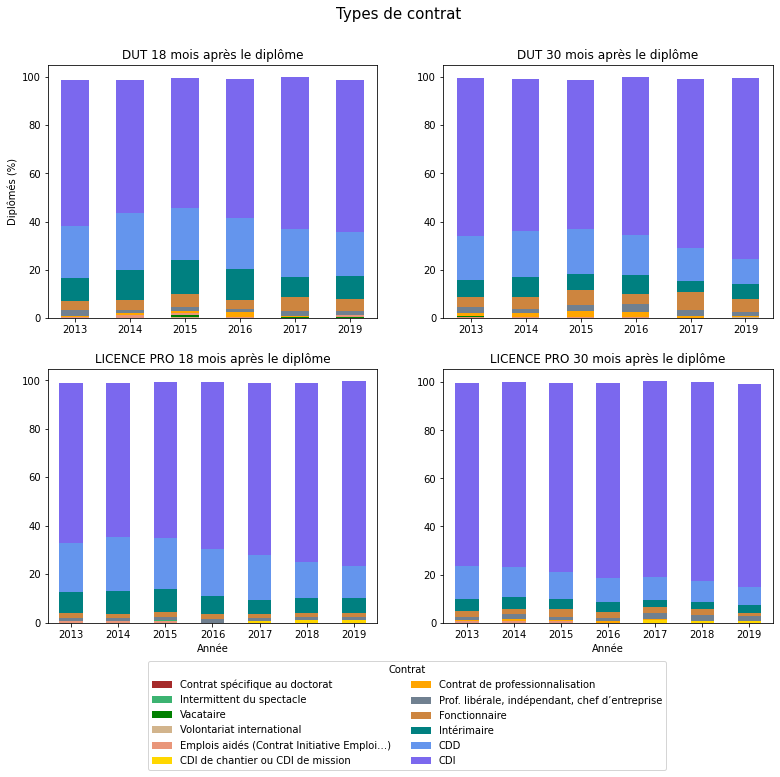

In [200]:
# Graphique du nombre de diplômés par type de contrat selon l'année
fig, (
    (ax1, ax2), 
    (ax3, ax4),
    ) = plt.subplots(2, 2, figsize=(13, 10), sharex=False, sharey=False)
fig.suptitle("Types de contrat", fontsize=15)
df_graph_dut_18.plot(kind="bar", stacked=True, ax=ax1, color=colors_dut_18, legend=False)
df_graph_dut_30.plot(kind="bar", stacked=True, ax=ax2, color=colors_dut_30, legend=False)
df_graph_lp_18.plot(kind="bar", stacked=True, ax=ax3, color=colors_lp_18, legend=False)
df_graph_lp_30.plot(kind="bar", stacked=True, ax=ax4, color=colors_lp_30, legend=False)
# ajustement de l'espace entre le titre général et le 1er graph
plt.subplots_adjust(top=0.90)

ax1.set_title("DUT 18 mois après le diplôme")
ax2.set_title("DUT 30 mois après le diplôme")
ax3.set_title("LICENCE PRO 18 mois après le diplôme")
ax4.set_title("LICENCE PRO 30 mois après le diplôme")

ax1.set_xticklabels(df_graph_dut_18.index, rotation=0)
ax2.set_xticklabels(df_graph_dut_30.index, rotation=0)
ax3.set_xticklabels(df_graph_lp_18.index, rotation=0)
ax4.set_xticklabels(df_graph_lp_30.index, rotation=0)
ax1.set_ylabel("Diplômés (%)")
ax1.set_xlabel(None)
ax2.set_xlabel(None)
plt.legend(loc='lower center', title='Contrat', bbox_to_anchor=(-0.11, -0.6), ncol=2)
plt.show()

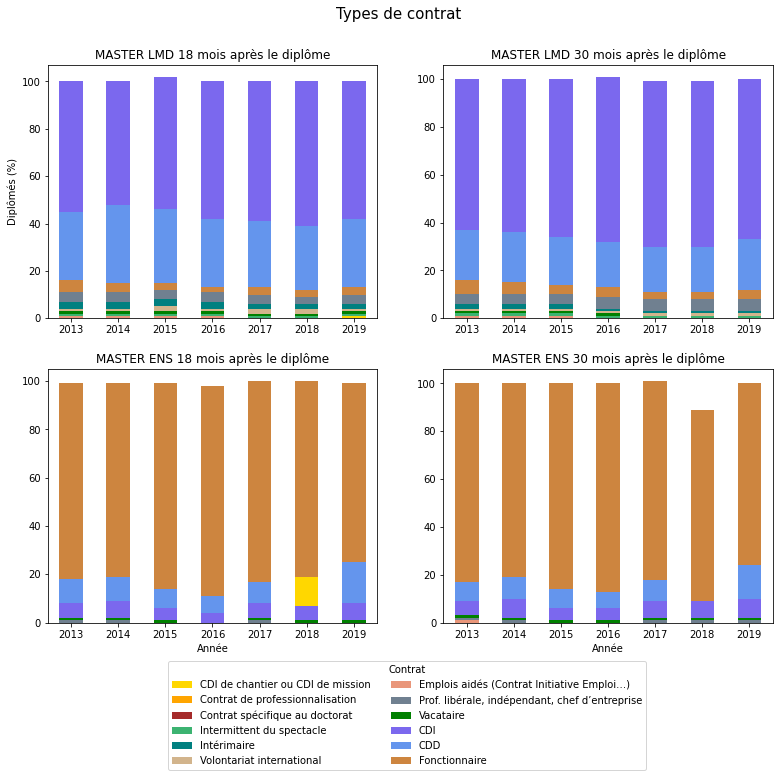

In [201]:
# Graphique du nombre de diplômés par type de contrat selon l'année
fig, (
        (ax1, ax2), 
        (ax3, ax4)
    ) = plt.subplots(2, 2, figsize=(13, 10), sharex=False, sharey=False)
fig.suptitle("Types de contrat", fontsize=15)
df_graph_master_lmd_18.plot(kind="bar", stacked=True, ax=ax1, color=colors_master_lmd_18, legend=False)
df_graph_master_lmd_30.plot(kind="bar", stacked=True, ax=ax2, color=colors_master_lmd_30, legend=False)
df_graph_master_ens_18.plot(kind="bar", stacked=True, ax=ax3, color=colors_master_ens_18, legend=False)
df_graph_master_ens_30.plot(kind="bar", stacked=True, ax=ax4, color=colors_master_ens_30, legend=False)
# ajustement de l'espace entre le titre général et le 1er graph
plt.subplots_adjust(top=0.90)

ax1.set_title("MASTER LMD 18 mois après le diplôme")
ax2.set_title("MASTER LMD 30 mois après le diplôme")
ax3.set_title("MASTER ENS 18 mois après le diplôme")
ax4.set_title("MASTER ENS 30 mois après le diplôme")

ax1.set_xticklabels(df_graph_master_lmd_18.index, rotation=0)
ax2.set_xticklabels(df_graph_master_lmd_30.index, rotation=0)
ax3.set_xticklabels(df_graph_master_ens_18.index, rotation=0)
ax4.set_xticklabels(df_graph_master_ens_30.index, rotation=0)
ax1.set_ylabel("Diplômés (%)")
ax1.set_xlabel(None)
ax2.set_xlabel(None)
plt.legend(loc='lower center', title='Contrat', bbox_to_anchor=(-0.11, -0.6), ncol=2)
plt.show()

Proportion des professions d'activités par année selon le niveau de diplôme et la situation

In [202]:
# Sélection des professions
df_profession = df[
    ["Année", "Diplôme", 
    "Discipline", "Genre", 
    "situation", "Nombre de réponses"] + liste_professions].sort_values("Année")

In [203]:
df_profession.head()

,Année,Diplôme,Discipline,Genre,situation,Nombre de réponses,Agriculteur,"Artisan, commerçant, chef d'entreprise",Profession libérale,Personnel de catégorie A de la fonction publique,"Ingénieur, cadre, prof. libérales, prof. intellectuelles sup",Personnel de catégorie B de la fonction publique,"Emploi de niveau intermédiaire : technicien, agent de maîtrise…",Personnel de catégorie C de la fonction publique,"Manœuvre, ouvrier","Employé de bureau, de commerce, personnel de service"
2948,2013,LICENCE PRO,Ensemble Licence professionnelle,femmes et hommes,30 mois après le diplôme,16625.0,0.0,0.0,0.0,1.0,10.0,3.0,56.0,3.0,3.0,23.0
47,2013,DUT,Autres sciences humaines et sociales,femmes et hommes,30 mois après le diplôme,126.0,0.0,0.0,0.0,4.0,5.0,15.0,26.0,13.0,1.0,36.0
5594,2013,MASTER LMD,Autres sciences humaines et sociales,femmes et hommes,18 mois après le diplôme,NaN,0.0,0.0,0.0,14.0,30.0,8.0,23.0,5.0,1.0,18.0
3052,2013,MASTER LMD,"Autres formations juridiques, économiques et d...",femmes et hommes,30 mois après le diplôme,NaN,0.0,0.0,0.0,10.0,49.0,5.0,22.0,4.0,0.0,10.0
3354,2013,MASTER LMD,Sciences de la vie et de la terre,femmes et hommes,18 mois après le diplôme,NaN,0.0,0.0,0.0,10.0,49.0,5.0,25.0,2.0,2.0,8.0


In [204]:
# Sélection de l'ensemble des hommes et des femmes
profession_full_genre = df_profession[(df_profession["Genre"] == "femmes et hommes")]

In [205]:
# Sélection de l'ensemble des départements pour les différents diplômes
df_ensemble = profession_full_genre[
    profession_full_genre["Discipline"].str.contains(
    r"Ensemble des départements|Masters enseignement|Ensemble Masters LMD|Ensemble Licence professionnelle")]

In [206]:
# Pourcentage de contrats par année, selon le diplôme, la discipline et le type de contrat 
df_ensemble = df_ensemble.melt(
    id_vars=["Année", "Diplôme", "Discipline", "Genre", "situation"], 
    value_vars=liste_professions, 
    var_name="profession", 
    value_name="%"
)

In [207]:
df_ensemble.head()

,Année,Diplôme,Discipline,Genre,situation,profession,%
0,2013,LICENCE PRO,Ensemble Licence professionnelle,femmes et hommes,30 mois après le diplôme,Agriculteur,0.0
1,2013,DUT,Ensemble des départements d''IUT,femmes et hommes,18 mois après le diplôme,Agriculteur,0.0
2,2013,DUT,Ensemble des départements d'IUT,femmes et hommes,18 mois après le diplôme,Agriculteur,0.0
3,2013,DUT,Ensemble des départements d'IUT,femmes et hommes,30 mois après le diplôme,Agriculteur,0.0
4,2013,LICENCE PRO,Ensemble Licence professionnelle,femmes et hommes,18 mois après le diplôme,Agriculteur,0.0


In [208]:
# Pourcentage de diplômés par type de profession pour chaque année
df_profession = df_ensemble.groupby(["Année", "profession"])[["%"]].mean()
df_profession.reset_index(inplace=True)

In [209]:
df_profession.head()

,Année,profession,%
0,2013,Agriculteur,0.000000
1,2013,"Artisan, commerçant, chef d'entreprise",0.000000
2,2013,"Emploi de niveau intermédiaire : technicien, a...",44.083333
3,2013,"Employé de bureau, de commerce, personnel de s...",14.916667
4,2013,"Ingénieur, cadre, prof. libérales, prof. intel...",14.000000


In [210]:
df_graph = df_ensemble.pivot_table(
    index=["Année", "Diplôme"], 
    columns=["situation", "profession"],
    values="%"
)

In [211]:
df_graph.head()

situation         18 mois après le diplôme  \
profession                     Agriculteur   
Année Diplôme                                
2013  DUT                              0.0   
      LICENCE PRO                      0.0   
      MASTER ENS                       0.0   
      MASTER LMD                       0.0   
2014  DUT                              0.0   

situation                                                 \
profession        Artisan, commerçant, chef d'entreprise   
Année Diplôme                                              
2013  DUT                                            0.0   
      LICENCE PRO                                    0.0   
      MASTER ENS                                     0.0   
      MASTER LMD                                     0.0   
2014  DUT                                            0.0   

situation                                                                          \
profession        Emploi de niveau intermédiaire : technicien, agent de maîtrise…   
Année Diplôme                                                                       
2013  DUT                                                       54.5                
      LICENCE PRO                                               66.0                
      MASTER ENS                                                 2.0                
      MASTER LMD                                                22.0                
2014  DUT                                                       55.5                

situation                                                               \
profession        Employé de bureau, de commerce, personnel de service   
Année Diplôme                                                            
2013  DUT                                                       22.5     
      LICENCE PRO                                               15.5     
      MASTER ENS                                                 4.0     
      MASTER LMD                                                14.0     
2014  DUT                                                       21.0     

situation                                                                       \
profession        Ingénieur, cadre, prof. libérales, prof. intellectuelles sup   
Année Diplôme                                                                    
2013  DUT                                                        6.5             
      LICENCE PRO                                                7.0             
      MASTER ENS                                                 4.0             
      MASTER LMD                                                48.0             
2014  DUT                                                        4.0             

situation                            \
profession        Manœuvre, ouvrier   
Année Diplôme                         
2013  DUT                       8.5   
      LICENCE PRO               4.5   
      MASTER ENS                0.0   
      MASTER LMD                1.0   
2014  DUT                      11.0   

situation                                                           \
profession        Personnel de catégorie A de la fonction publique   
Année Diplôme                                                        
2013  DUT                                                      1.5   
      LICENCE PRO                                              1.0   
      MASTER ENS                                              81.0   
      MASTER LMD                                               9.0   
2014  DUT                                                      1.0   

situation                                                           \
profession        Personnel de catégorie B de la fonction publique   
Année Diplôme                                                        
2013  DUT                                                      4.0   
      LICENCE PRO                                              3.

In [212]:
# Définition de la palette des couleurs pour les catégories de profession
colors = [
    "cornflowerblue", "mediumslateblue", "gold", 
    "orange", "brown", "darksalmon", 
    "peru", "mediumseagreen", "teal", 
    "slategray"
]

# Définition des catégories de profession
categories = df_graph.columns.get_level_values("profession").tolist()

# Map des couleurs selon les catégories de profession
map_colors = dict(zip(categories, colors))

In [213]:
# Sélection des DUT
df_graph_dut = df_graph[df_graph.index.get_level_values("Diplôme") == "DUT"]

# Réordonnancement des colonnes par rapport à leur valeur maximale
# valeur maximale du nombre de diplômé par situation
df_max_dut = df_graph_dut.max()
# liste des contrats triée 18 et 30 mois après l'obtention du diplôme
trie_18 = df_max_dut.loc["18 mois après le diplôme"].sort_values().index
trie_30 = df_max_dut.loc["30 mois après le diplôme"].sort_values().index
# réordonnancement par situation des contrats dans la dataframe
df_graph_dut_18 = df_graph_dut.loc[:, "18 mois après le diplôme"][trie_18]
df_graph_dut_30 = df_graph_dut.loc[:, "30 mois après le diplôme"][trie_30]
# 
df_graph_dut_18.reset_index("Diplôme", drop=True, inplace=True)
df_graph_dut_30.reset_index("Diplôme", drop=True, inplace=True)

# Réordonnancement du map des couleurs pour les DUT
colors_dut_18 = [map_colors[categorie] for categorie in trie_18]
colors_dut_30 = [map_colors[categorie] for categorie in trie_30]

In [214]:
# Sélection des licences professionnelles
df_graph_lp = df_graph[df_graph.index.get_level_values("Diplôme") == "LICENCE PRO"]

## Réordonnancement des colonnes par rapport à leur valeur maximale ##
# valeur maximale du nombre de diplômé par situation
df_max_lp = df_graph_lp.max()
# liste des contrats triée 18 et 30 mois après l'obtention du diplôme
trie_18 = df_max_lp.loc["18 mois après le diplôme"].sort_values().index
trie_30 = df_max_lp.loc["30 mois après le diplôme"].sort_values().index
# réordonnancement par situation des contrats dans la dataframe
df_graph_lp_18 = df_graph_lp.loc[:, "18 mois après le diplôme"][trie_18]
df_graph_lp_30 = df_graph_lp.loc[:, "30 mois après le diplôme"][trie_30]
#
df_graph_lp_18.reset_index("Diplôme", drop=True, inplace=True)
df_graph_lp_30.reset_index("Diplôme", drop=True, inplace=True)

# Réordonnancement du map des couleurs pour les licences
colors_lp_18 = [map_colors[categorie] for categorie in trie_18]
colors_lp_30 = [map_colors[categorie] for categorie in trie_30]

In [215]:
# Sélection des masters ENS
df_graph_master_ens = df_graph[df_graph.index.get_level_values("Diplôme") == "MASTER ENS"]

## Réordonnancement des colonnes par rapport à leur valeur maximale ##
# valeur maximale du nombre de diplômé par situation
df_max_master_ens = df_graph_master_ens.max()
# liste des contrats triée 18 et 30 mois après l'obtention du diplôme
trie_18 = df_max_master_ens.loc["18 mois après le diplôme"].sort_values().index
trie_30 = df_max_master_ens.loc["30 mois après le diplôme"].sort_values().index
# réordonnancement par situation des contrats dans la dataframe
df_graph_master_ens_18 = df_graph_master_ens.loc[:, "18 mois après le diplôme"][trie_18]
df_graph_master_ens_30 = df_graph_master_ens.loc[:, "30 mois après le diplôme"][trie_30]
#
df_graph_master_ens_18.reset_index("Diplôme", drop=True, inplace=True)
df_graph_master_ens_30.reset_index("Diplôme", drop=True, inplace=True)

# Réordonnancement du map des couleurs pour les master ENS
colors_master_ens_18 = [map_colors[categorie] for categorie in trie_18]
colors_master_ens_30 = [map_colors[categorie] for categorie in trie_30]

In [216]:
# Sélection des masters LMD
df_graph_master_lmd = df_graph[df_graph.index.get_level_values("Diplôme") == "MASTER LMD"]

## Réordonnancement des colonnes par rapport à leur valeur maximale ##
# valeur maximale du nombre de diplômé par situation
df_max_master_lmd = df_graph_master_lmd.max()
# liste des contrats triée 18 et 30 mois après l'obtention du diplôme
trie_18 = df_max_master_lmd.loc["18 mois après le diplôme"].sort_values().index
trie_30 = df_max_master_lmd.loc["30 mois après le diplôme"].sort_values().index
# réordonnancement par situation des contrats dans la dataframe
df_graph_master_lmd_18 = df_graph_master_lmd.loc[:, "18 mois après le diplôme"][trie_18]
df_graph_master_lmd_30 = df_graph_master_lmd.loc[:, "30 mois après le diplôme"][trie_30]
#
df_graph_master_lmd_18.reset_index("Diplôme", drop=True, inplace=True)
df_graph_master_lmd_30.reset_index("Diplôme", drop=True, inplace=True)

# Réordonnancement du map des couleurs pour les master LMD
colors_master_lmd_18 = [map_colors[categorie] for categorie in trie_18]
colors_master_lmd_30 = [map_colors[categorie] for categorie in trie_30]

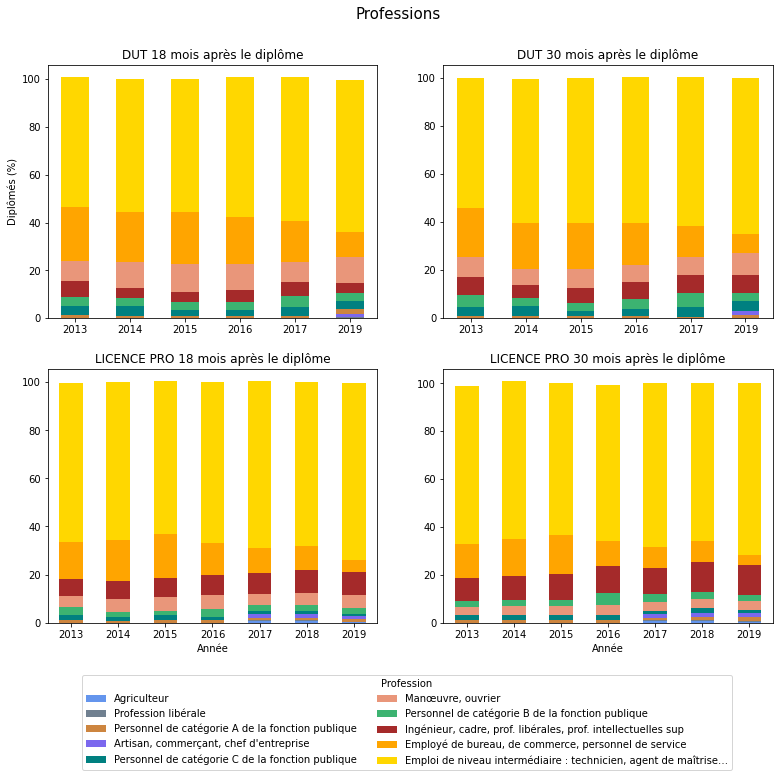

In [217]:
# Graphique du nombre de diplômés par type de contrat selon l'année
fig, (
    (ax1, ax2), 
    (ax3, ax4),
    ) = plt.subplots(2, 2, figsize=(13, 10), sharex=False, sharey=False)
fig.suptitle("Professions", fontsize=15)
df_graph_dut_18.plot(kind="bar", stacked=True, ax=ax1, color=colors_dut_18, legend=False)
df_graph_dut_30.plot(kind="bar", stacked=True, ax=ax2, color=colors_dut_30, legend=False)
df_graph_lp_18.plot(kind="bar", stacked=True, ax=ax3, color=colors_lp_18, legend=False)
df_graph_lp_30.plot(kind="bar", stacked=True, ax=ax4, color=colors_lp_30, legend=False)
# ajustement de l'espace entre le titre général et le 1er graph
plt.subplots_adjust(top=0.90)

ax1.set_title("DUT 18 mois après le diplôme")
ax2.set_title("DUT 30 mois après le diplôme")
ax3.set_title("LICENCE PRO 18 mois après le diplôme")
ax4.set_title("LICENCE PRO 30 mois après le diplôme")

ax1.set_xticklabels(df_graph_dut_18.index, rotation=0)
ax2.set_xticklabels(df_graph_dut_30.index, rotation=0)
ax3.set_xticklabels(df_graph_lp_18.index, rotation=0)
ax4.set_xticklabels(df_graph_lp_30.index, rotation=0)
ax1.set_ylabel("Diplômés (%)")
ax1.set_xlabel(None)
ax2.set_xlabel(None)
plt.legend(loc='lower center', title='Profession', bbox_to_anchor=(-0.11, -0.6), ncol=2)
plt.show()

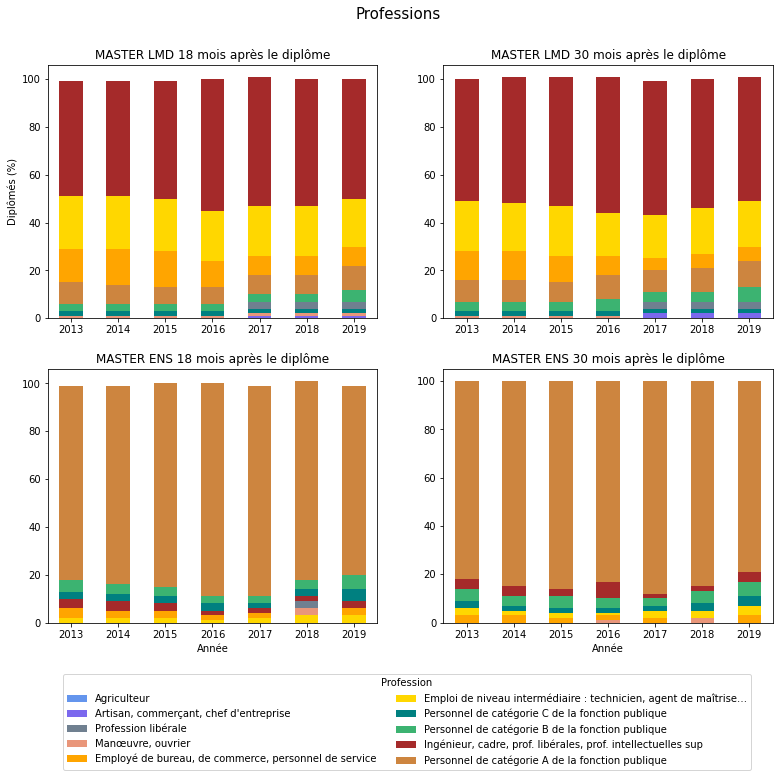

In [218]:
# Graphique du nombre de diplômés par type de contrat selon l'année
fig, (
        (ax1, ax2), 
        (ax3, ax4)
    ) = plt.subplots(2, 2, figsize=(13, 10), sharex=False, sharey=False)
fig.suptitle("Professions", fontsize=15)
df_graph_master_lmd_18.plot(kind="bar", stacked=True, ax=ax1, color=colors_master_lmd_18, legend=False)
df_graph_master_lmd_30.plot(kind="bar", stacked=True, ax=ax2, color=colors_master_lmd_30, legend=False)
df_graph_master_ens_18.plot(kind="bar", stacked=True, ax=ax3, color=colors_master_ens_18, legend=False)
df_graph_master_ens_30.plot(kind="bar", stacked=True, ax=ax4, color=colors_master_ens_30, legend=False)
# ajustement de l'espace entre le titre général et le 1er graph
plt.subplots_adjust(top=0.90)

#ax2.legend(title="Profession", bbox_to_anchor=(1, 1.02))
ax1.set_title("MASTER LMD 18 mois après le diplôme")
ax2.set_title("MASTER LMD 30 mois après le diplôme")
ax3.set_title("MASTER ENS 18 mois après le diplôme")
ax4.set_title("MASTER ENS 30 mois après le diplôme")

ax1.set_xticklabels(df_graph_master_lmd_18.index, rotation=0)
ax2.set_xticklabels(df_graph_master_lmd_30.index, rotation=0)
ax3.set_xticklabels(df_graph_master_ens_18.index, rotation=0)
ax4.set_xticklabels(df_graph_master_ens_30.index, rotation=0)
ax1.set_ylabel("Diplômés (%)")
ax1.set_xlabel(None)
ax2.set_xlabel(None)
plt.legend(loc='lower center', title='Profession', bbox_to_anchor=(-0.11, -0.6), ncol=2)
plt.show()

Répartiton des différentes secteurs par année selon le niveau de diplôme et la situation

In [219]:
df_secteur = df[
    ["Année", "Diplôme", 
    "Discipline", "Genre", 
    "situation", "Nombre de réponses"] + liste_secteurs].sort_values("Année")

In [220]:
# Sélection de l'ensemble des hommes et des femmes
secteur_full_genre = df_secteur[(df_secteur["Genre"] == "femmes et hommes")]

# Sélection de l'ensemble des départements pour les différents diplômes
df_ensemble = secteur_full_genre[
    profession_full_genre["Discipline"].str.contains(
    r"Ensemble des départements|Masters enseignement|Ensemble Masters LMD|Ensemble Licence professionnelle")]

In [221]:
df_ensemble.head()

,Année,Diplôme,Discipline,Genre,situation,Nombre de réponses,"Agriculture, sylviculture et pêche","Industries (manufacturières, extractives et autres)",Construction,Activités immobilières,"Commerce, transports, héberg-ement et restauration",Information et communication,Activités financières et d’assurance,"Activités spécialisées, scientifiques et techniques",Activités de services administratifs et de soutien,Enseignement,Administration publique (hors ens.),Santé humaine et action sociale,"Arts, spectacles et activités récréatives",Autres activités de service
2948,2013,LICENCE PRO,Ensemble Licence professionnelle,femmes et hommes,30 mois après le diplôme,16625.0,4.0,20.0,7.0,0.0,17.0,6.0,10.0,11.0,3.0,2.0,5.0,5.0,2.0,8.0
56,2013,DUT,Ensemble des départements d''IUT,femmes et hommes,18 mois après le diplôme,2054.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
769,2013,DUT,Ensemble des départements d'IUT,femmes et hommes,18 mois après le diplôme,456.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
770,2013,DUT,Ensemble des départements d'IUT,femmes et hommes,30 mois après le diplôme,456.0,2.0,47.0,14.0,0.0,10.0,3.0,0.0,8.0,2.0,2.0,4.0,0.0,2.0,6.0
1423,2013,LICENCE PRO,Ensemble Licence professionnelle,femmes et hommes,18 mois après le diplôme,16625.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [222]:
df_ensemble = df_ensemble.melt(id_vars=[
    "Année", 
    "Diplôme", 
    "Discipline", 
    "Genre", 
    "situation"
    ], value_vars=liste_secteurs, var_name="secteur", value_name="%")

In [223]:
df_graph = df_ensemble.pivot_table(index=[
    "Année", 
    "Diplôme"], columns=[
        "situation", 
        "secteur"
        ], values="%")

In [224]:
df_graph.head()

situation                                   18 mois après le diplôme  \
secteur           Activités de services administratifs et de soutien   
Année Diplôme                                                          
2013  DUT                                                        0.0   
      LICENCE PRO                                                0.0   
      MASTER ENS                                                 0.0   
      MASTER LMD                                                 0.0   
2014  DUT                                                        0.0   

situation                                                                      \
secteur           Activités financières et d’assurance Activités immobilières   
Année Diplôme                                                                   
2013  DUT                                          0.0                    0.0   
      LICENCE PRO                                  0.0                    0.0   
      MASTER ENS                                   0.0                    0.0   
      MASTER LMD                                   0.0                    0.0   
2014  DUT                                          0.0                    0.0   

situation                                                              \
secteur           Activités spécialisées, scientifiques et techniques   
Année Diplôme                                                           
2013  DUT                                                        0.0    
      LICENCE PRO                                                0.0    
      MASTER ENS                                                 0.0    
      MASTER LMD                                                 0.0    
2014  DUT                                                        0.0    

situation                                              \
secteur           Administration publique (hors ens.)   
Année Diplôme                                           
2013  DUT                                         0.0   
      LICENCE PRO                                 0.0   
      MASTER ENS                                  0.0   
      MASTER LMD                                  0.0   
2014  DUT                                         0.0   

situation                                             \
secteur           Agriculture, sylviculture et pêche   
Année Diplôme                                          
2013  DUT                                        0.0   
      LICENCE PRO                                0.0   
      MASTER ENS                                 0.0   
      MASTER LMD                                 0.0   
2014  DUT                                        0.0   

situation                                                    \
secteur           Arts, spectacles et activités récréatives   
Année Diplôme                                                 
2013  DUT                                               0.0   
      LICENCE PRO                                       0.0   
      MASTER ENS                                        0.0   
      MASTER LMD                                        0.0   
2014  DUT                                               0.0   

situation                                      \
secteur           Autres activités de service   
Année Diplôme                                   
2013  DUT                                 0.0   
      LICENCE PRO                         0.0   
      MASTER ENS                          0.0   
      MASTER LMD                          0.0   
2014  DUT                                 0.0   

situation                                                             \
secteur           Commerce, transports, héberg-ement et restauration   
Année Diplôme                                                          
2013  DUT                                                        0.0   
      LICENCE PRO                                                0.0   
      MASTER ENS         

In [225]:
# Définition de la palette des couleurs pour les secteurs
colors = distinctipy.get_colors(len(liste_secteurs))

# Définition des catégories des secteurs
categories = df_graph.columns.get_level_values("secteur").tolist()

# Map des couleurs selon les secteurs
map_colors = dict(zip(categories, colors))

In [226]:
# Sélection des DUT
df_graph_dut = df_graph[df_graph.index.get_level_values("Diplôme") == "DUT"]

# Réordonnancement des colonnes par rapport à leur valeur maximale
# valeur maximale du nombre de diplômé par situation
df_max_dut = df_graph_dut.max()
# liste des secteurs triée 18 et 30 mois après l'obtention du diplôme
trie_18 = df_max_dut.loc["18 mois après le diplôme"].sort_values().index
trie_30 = df_max_dut.loc["30 mois après le diplôme"].sort_values().index
# réordonnancement par situation des contrats dans la dataframe
df_graph_dut_18 = df_graph_dut.loc[:, "18 mois après le diplôme"][trie_18]
df_graph_dut_30 = df_graph_dut.loc[:, "30 mois après le diplôme"][trie_30]
# 
df_graph_dut_18.reset_index("Diplôme", drop=True, inplace=True)
df_graph_dut_30.reset_index("Diplôme", drop=True, inplace=True)

# Réordonnancement du map des couleurs pour les DUT
colors_dut_18 = [map_colors[categorie] for categorie in trie_18]
colors_dut_30 = [map_colors[categorie] for categorie in trie_30]

In [227]:
# Sélection des licences professionnelles
df_graph_lp = df_graph[df_graph.index.get_level_values("Diplôme") == "LICENCE PRO"]

## Réordonnancement des colonnes par rapport à leur valeur maximale ##
# valeur maximale du nombre de diplômé par situation
df_max_lp = df_graph_lp.max()
# liste des secteurs triée 18 et 30 mois après l'obtention du diplôme
trie_18 = df_max_lp.loc["18 mois après le diplôme"].sort_values().index
trie_30 = df_max_lp.loc["30 mois après le diplôme"].sort_values().index
# réordonnancement par situation des secteurs dans la dataframe
df_graph_lp_18 = df_graph_lp.loc[:, "18 mois après le diplôme"][trie_18]
df_graph_lp_30 = df_graph_lp.loc[:, "30 mois après le diplôme"][trie_30]
#
df_graph_lp_18.reset_index("Diplôme", drop=True, inplace=True)
df_graph_lp_30.reset_index("Diplôme", drop=True, inplace=True)

# Réordonnancement du map des couleurs pour les licences
colors_lp_18 = [map_colors[categorie] for categorie in trie_18]
colors_lp_30 = [map_colors[categorie] for categorie in trie_30]

In [228]:
# Sélection des masters ENS
df_graph_master_ens = df_graph[df_graph.index.get_level_values("Diplôme") == "MASTER ENS"]

## Réordonnancement des colonnes par rapport à leur valeur maximale ##
# valeur maximale du nombre de diplômé par situation
df_max_master_ens = df_graph_master_ens.max()
# liste des secteurs triée 18 et 30 mois après l'obtention du diplôme
trie_18 = df_max_master_ens.loc["18 mois après le diplôme"].sort_values().index
trie_30 = df_max_master_ens.loc["30 mois après le diplôme"].sort_values().index
# réordonnancement par situation des secteurs dans la dataframe
df_graph_master_ens_18 = df_graph_master_ens.loc[:, "18 mois après le diplôme"][trie_18]
df_graph_master_ens_30 = df_graph_master_ens.loc[:, "30 mois après le diplôme"][trie_30]
#
df_graph_master_ens_18.reset_index("Diplôme", drop=True, inplace=True)
df_graph_master_ens_30.reset_index("Diplôme", drop=True, inplace=True)

# Réordonnancement du map des couleurs pour les master ENS
colors_master_ens_18 = [map_colors[categorie] for categorie in trie_18]
colors_master_ens_30 = [map_colors[categorie] for categorie in trie_30]

In [229]:
# Sélection des masters LMD
df_graph_master_lmd = df_graph[df_graph.index.get_level_values("Diplôme") == "MASTER LMD"]

## Réordonnancement des colonnes par rapport à leur valeur maximale ##
# valeur maximale du nombre de diplômé par situation
df_max_master_lmd = df_graph_master_lmd.max()
# liste des secteurs triée 18 et 30 mois après l'obtention du diplôme
trie_18 = df_max_master_lmd.loc["18 mois après le diplôme"].sort_values().index
trie_30 = df_max_master_lmd.loc["30 mois après le diplôme"].sort_values().index
# réordonnancement par situation des secteurs dans la dataframe
df_graph_master_lmd_18 = df_graph_master_lmd.loc[:, "18 mois après le diplôme"][trie_18]
df_graph_master_lmd_30 = df_graph_master_lmd.loc[:, "30 mois après le diplôme"][trie_30]
#
df_graph_master_lmd_18.reset_index("Diplôme", drop=True, inplace=True)
df_graph_master_lmd_30.reset_index("Diplôme", drop=True, inplace=True)

# Réordonnancement du map des couleurs pour les master LMD
colors_master_lmd_18 = [map_colors[categorie] for categorie in trie_18]
colors_master_lmd_30 = [map_colors[categorie] for categorie in trie_30]

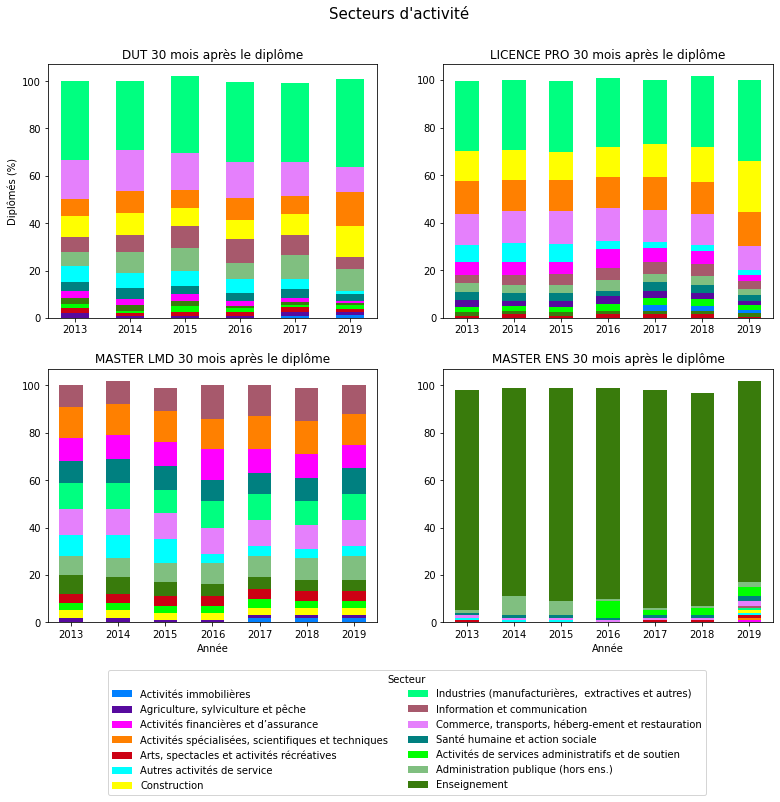

In [230]:
# Graphique du nombre de diplômés par secteur selon l'année
# Les données sont manquantes après 18 mois
fig, (
    (ax1, ax2), 
    (ax3, ax4),
    ) = plt.subplots(2, 2, figsize=(13, 10), sharex=False, sharey=False)
fig.suptitle("Secteurs d'activité", fontsize=15)
df_graph_dut_30.plot(kind="bar", stacked=True, ax=ax1, color=colors_dut_30, legend=False)
df_graph_lp_30.plot(kind="bar", stacked=True, ax=ax2, color=colors_lp_30, legend=False)
df_graph_master_lmd_30.plot(kind="bar", stacked=True, ax=ax3, color=colors_master_lmd_30, legend=False)
df_graph_master_ens_30.plot(kind="bar", stacked=True, ax=ax4, color=colors_master_ens_30, legend=False)
plt.subplots_adjust(top=0.90)

ax1.set_title("DUT 30 mois après le diplôme")
ax2.set_title("LICENCE PRO 30 mois après le diplôme")
ax3.set_title("MASTER LMD 30 mois après le diplôme")
ax4.set_title("MASTER ENS 30 mois après le diplôme")

#ax2.legend(title="Secteur", bbox_to_anchor=(1, 1.02))
ax1.set_xticklabels(df_graph_dut_30.index, rotation=0)
ax2.set_xticklabels(df_graph_lp_30.index, rotation=0)
ax3.set_xticklabels(df_graph_master_lmd_30.index, rotation=0)
ax4.set_xticklabels(df_graph_master_ens_30.index, rotation=0)
ax1.set_ylabel("Diplômés (%)")

ax1.set_xlabel(None)
ax2.set_xlabel(None)
plt.legend(loc='lower center', title='Secteur', bbox_to_anchor=(-0.11, -0.7), ncol=2)
plt.show()

Statistiques descriptives


In [231]:
# Selection des variables à analyser
selection = [
    "Année", "Genre", 
    "Nombre de réponses", "Diplôme", 
    "situation", "Discipline",
    "Salaire net mensuel médian des emplois à temps plein",
    "Premier quartile des salaires nets mensuels des emplois à temps plein",
    "Dernier quartile des salaires nets mensuels des emplois à temps plein",
    "Salaire net mensuel médian national",
    "Taux d’insertion"]

In [232]:
# Initialisation des valeurs manquantes
df_stat_na = ins_prof_na[selection]
df_stat_na = df_stat_na.replace(["ns", "nd"], [np.NaN, np.NaN])
# Taux de valeur manquantes
taux_na = df_stat_na.isna().sum()
taux_na.name = "NA"
taux_na = pd.DataFrame(taux_na)
# Nombre total de valeur par variable
total = df_stat_na.shape[0]
taux_na["% NA"] = round(taux_na["NA"] / total * 100)

In [233]:
# Suppression des ensembles par diplôme et selection par genre
df_stat = ins_prof[selection]
df_stat = df_stat[
    (~df_stat.loc[:, "Discipline"].str.contains(r"^[Ensemble|Autres]")) &
    (~df_stat.loc[:, "Genre"].str.contains(r"^femmes et hommes")) &
    (df_stat["Année"] > '2012')]
df_stat.sort_values(["Année", "Diplôme"], inplace=True)

In [234]:
# liste des disciplines
df_stat["Discipline"].unique()

array(['Droit', 'Information communication',
       'Sciences de la vie et de la terre', 'Gestion',
       'Sciences fondamentales', 'Informatique', 'Lettres, langues, arts',
       'Histoire-géographie', 'Psychologie', 'Économie',
       'Masters enseignement', "Sciences de l'ingénieur"], dtype=object)

In [235]:
# Renommage des sciences de l'ingénieur
df_stat.loc[df_stat.loc[:, "Discipline"] == "Sciences de l''ingénieur", "Discipline"] = "Sciences de l'ingénieur"

In [236]:
df_stat.head()

,Année,Genre,Nombre de réponses,Diplôme,situation,Discipline,Salaire net mensuel médian des emplois à temps plein,Premier quartile des salaires nets mensuels des emplois à temps plein,Dernier quartile des salaires nets mensuels des emplois à temps plein,Salaire net mensuel médian national,Taux d’insertion
0,2013,hommes,5.0,DUT,30 mois après le diplôme,Droit,0.0,0.0,0.0,1870,0.0
10,2013,hommes,22.0,DUT,18 mois après le diplôme,Information communication,0.0,0.0,0.0,1870,0.0
113,2013,femmes,130.0,DUT,18 mois après le diplôme,Sciences de la vie et de la terre,1400.0,1300.0,1510.0,1870,88.0
163,2013,hommes,58.0,DUT,18 mois après le diplôme,Gestion,1500.0,0.0,0.0,1870,70.0
187,2013,femmes,7.0,DUT,30 mois après le diplôme,Sciences de la vie et de la terre,0.0,0.0,0.0,1870,0.0


In [237]:
# Nombre de diplômés selon le genre
df_distrib_genre = df_stat.groupby(["Genre"])[["Nombre de réponses"]].sum()

# Proportion en %
total = df_distrib_genre["Nombre de réponses"].sum()
df_distrib_genre["%"] = df_distrib_genre["Nombre de réponses"] / total * 100

df_distrib_genre.reset_index(inplace=True)

In [238]:
df_distrib_genre.head()

,Genre,Nombre de réponses,%
0,femmes,360364.0,60.796302
1,hommes,232376.0,39.203698


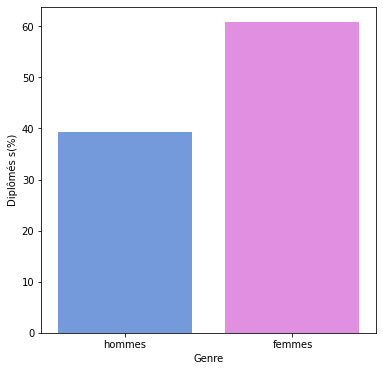

In [239]:
# Nombre d'hommes et de femmes diplômés sur toute la période
fig, ax = plt.subplots(figsize=(6,6))
sns.barplot(
    data=df_distrib_genre, 
    x="Genre", 
    y="%",
    order=["hommes", "femmes"],
    palette=["cornflowerblue", "violet"],
    ax=ax)
ax.set_ylabel("Diplômés s(%)")
plt.show()

In [240]:
# Nombre de diplômés par diplôme selon le genre sur l'ensemble de la période (2013-2019)
df_diplome_genre = df_stat.groupby(["Diplôme", "Genre"])[["Nombre de réponses"]].sum()
df_diplome_genre.reset_index(inplace=True)

In [241]:
df_diplome_genre

,Diplôme,Genre,Nombre de réponses
0,DUT,femmes,8560.0
1,DUT,hommes,9328.0
2,LICENCE PRO,femmes,72910.0
3,LICENCE PRO,hommes,56474.0
4,MASTER ENS,femmes,56912.0
5,MASTER ENS,hommes,16400.0
6,MASTER LMD,femmes,221982.0
7,MASTER LMD,hommes,150174.0


In [242]:
# Nombre total de réponses
total = df_diplome_genre["Nombre de réponses"].sum()

# Pourcentage de réponses
df_diplome_genre["%"] = round(df_diplome_genre["Nombre de réponses"] / total * 100, 1)

In [243]:
df_diplome_genre

,Diplôme,Genre,Nombre de réponses,%
0,DUT,femmes,8560.0,1.4
1,DUT,hommes,9328.0,1.6
2,LICENCE PRO,femmes,72910.0,12.3
3,LICENCE PRO,hommes,56474.0,9.5
4,MASTER ENS,femmes,56912.0,9.6
5,MASTER ENS,hommes,16400.0,2.8
6,MASTER LMD,femmes,221982.0,37.5
7,MASTER LMD,hommes,150174.0,25.3


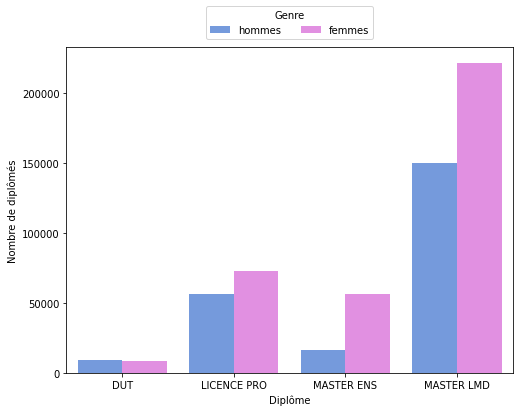

In [244]:
# Représentation graphique du nombre de diplômés par diplôme selon le genre
fig, ax = plt.subplots(figsize=(8,6))
sns.barplot(
    data=df_diplome_genre,
    x="Diplôme",
    y="Nombre de réponses",
    hue="Genre",
    hue_order=["hommes", "femmes"],
    palette=["cornflowerblue", "violet"],
    ax=ax
)
ax.set_ylabel("Nombre de diplômés")
plt.legend(loc='upper center', title='Genre', bbox_to_anchor=(0.5, 1.14), ncol=2)
plt.show()

##### SALAIRES ######

In [245]:
# Ensembles des disciplines par diplôme et année selon le genre
df_stat = ins_prof[selection]
df_stat = df_stat[
    df_stat["Discipline"].str.contains(r"Ensemble des départements|Ensemble Licence professionnelle|Ensemble Masters LMD|Masters enseignement") &
    ~df_stat["Genre"].str.contains(r"femmes et hommes") &
    #(df_stat["situation"] == "30 mois après le diplôme") &
    (df_stat["Année"] > "2012")
    ]

In [246]:
df_stat.sort_values(["Année", "Diplôme"]).head()

,Année,Genre,Nombre de réponses,Diplôme,situation,Discipline,Salaire net mensuel médian des emplois à temps plein,Premier quartile des salaires nets mensuels des emplois à temps plein,Dernier quartile des salaires nets mensuels des emplois à temps plein,Salaire net mensuel médian national,Taux d’insertion
45,2013,femmes,5.0,DUT,30 mois après le diplôme,Ensemble des départements d'IUT,0.0,0.0,0.0,1870,0.0
57,2013,hommes,1135.0,DUT,30 mois après le diplôme,Ensemble des départements d''IUT,1600.0,1350.0,1850.0,1870,90.0
122,2013,hommes,70.0,DUT,30 mois après le diplôme,Ensemble des départements d'IUT,1650.0,1440.0,1920.0,1870,99.0
130,2013,femmes,2.0,DUT,30 mois après le diplôme,Ensemble des départements d'IUT,0.0,0.0,0.0,1870,0.0
131,2013,femmes,2.0,DUT,18 mois après le diplôme,Ensemble des départements d'IUT,0.0,0.0,0.0,1870,0.0


In [247]:
# Suppression des salaires médians nuls
df_stat.drop(df_stat[df_stat["Salaire net mensuel médian des emplois à temps plein"] == 0].index, inplace=True)

In [248]:
# Somme du nombre de réponses par salaires médians
df_median = df_stat[[
    "Année", "Genre", 
    "Diplôme", "Salaire net mensuel médian des emplois à temps plein", 
    "Nombre de réponses"
    ]]

In [249]:
df_median["Salaire net mensuel médian des emplois à temps plein"].sort_values().unique()

array([   55.,  1350.,  1400.,  1410.,  1430.,  1440.,  1450.,  1460.,
        1480.,  1500.,  1510.,  1520.,  1530.,  1540.,  1550.,  1560.,
        1570.,  1580.,  1590.,  1600.,  1610.,  1620.,  1630.,  1640.,
        1650.,  1660.,  1670.,  1680.,  1690.,  1700.,  1710.,  1720.,
        1730.,  1740.,  1750.,  1760.,  1770.,  1780.,  1790.,  1800.,
        1810.,  1830.,  1840.,  1850.,  1870.,  1880.,  1890.,  1900.,
        1920.,  1930.,  1950.,  1960.,  1970.,  1980.,  2000.,  2020.,
        2050.,  2070.,  2080.,  2100.,  2160.,  2200.,  2210.,  2220.,
       23100.])

# Salaire médian selon le genre et le diplôme #

In [250]:
# Salaire par genre selon le diplôme
df_median_genre = df_median.groupby(
    ["Genre", "Diplôme"]
    ).agg(
        {
            "Salaire net mensuel médian des emplois à temps plein": "median", 
            "Nombre de réponses": "sum"})
df_median_genre.reset_index(inplace=True)

In [251]:
df_median_genre

,Genre,Diplôme,Salaire net mensuel médian des emplois à temps plein,Nombre de réponses
0,femmes,DUT,1400.0,9512.0
1,femmes,LICENCE PRO,1600.0,93804.0
2,femmes,MASTER ENS,1750.0,56912.0
3,femmes,MASTER LMD,1820.0,208954.0
4,hommes,DUT,1650.0,18962.0
5,hommes,LICENCE PRO,1730.0,157746.0
6,hommes,MASTER ENS,1800.0,16400.0
7,hommes,MASTER LMD,2075.0,149682.0


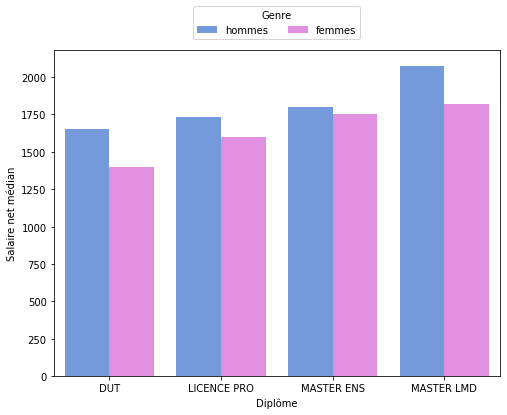

In [252]:
fig, ax = plt.subplots(figsize=(8,6))
sns.barplot(
    data= df_median_genre,
    x="Diplôme",
    y="Salaire net mensuel médian des emplois à temps plein",
    hue="Genre",
    hue_order=["hommes", "femmes"],
    palette=["cornflowerblue", "violet"],
    ax=ax
)
ax.set_ylabel("Salaire net médian")
plt.legend(loc='upper center', title='Genre', bbox_to_anchor=(0.5, 1.15), ncol=2)
plt.show()

# Distribution des quartiles des salaires sur toute la période #

In [253]:
# Selection de tous les quartiles
select = df_median.columns.to_list() + [
    "Premier quartile des salaires nets mensuels des emplois à temps plein", 
    "Dernier quartile des salaires nets mensuels des emplois à temps plein"
    ]
df_quartiles = df_stat[select]

# groupement de tous les quartiles par genre
df_quartiles_genre = df_quartiles.melt(
    id_vars=["Année", "Genre"], 
    value_vars=[
        "Salaire net mensuel médian des emplois à temps plein",
        "Premier quartile des salaires nets mensuels des emplois à temps plein",
        "Dernier quartile des salaires nets mensuels des emplois à temps plein"
        ],
    var_name="quantile",
    value_name="salaire"
    )

In [254]:
df_quartiles_genre.head()

,Année,Genre,quantile,salaire
0,2013,hommes,Salaire net mensuel médian des emplois à temps...,1600.0
1,2019,hommes,Salaire net mensuel médian des emplois à temps...,1740.0
2,2015,femmes,Salaire net mensuel médian des emplois à temps...,1400.0
3,2015,femmes,Salaire net mensuel médian des emplois à temps...,1350.0
4,2017,hommes,Salaire net mensuel médian des emplois à temps...,1700.0


In [255]:
df_quartiles_genre.groupby("Genre")[["salaire"]].quantile([0.25, 0.5, 0.75])

salaire
Genre               
femmes 0.25   1450.0
       0.50   1600.0
       0.75   1800.0
hommes 0.25   1560.0
       0.50   1730.0
       0.75   1910.0

In [256]:
df_quartiles_genre.groupby("Genre")[["salaire"]].median()

,salaire
Genre,
femmes,1600.0
hommes,1730.0


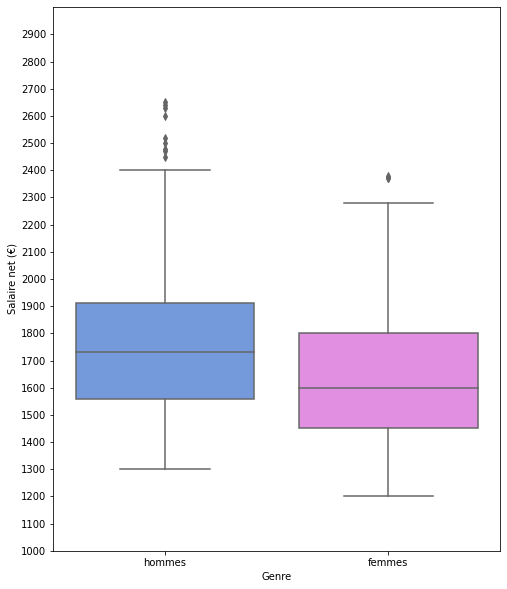

In [257]:
# Définition de la graduation des salaires
yticks = range(1000, 3000, 100)
plt.figure(figsize=(8,10))
sns.boxplot(
    data=df_quartiles_genre,
    x="Genre",
    y="salaire",
    order=["hommes", "femmes"],
    palette=["cornflowerblue", "violet"],
)
plt.yticks(yticks, [f"{int(y)}" for y in yticks])
# On limite la tranche des salaires entre 1000 et 4000 €
plt.ylim(1000, 3000)
plt.ylabel("Salaire net (€)")
plt.show()

In [258]:
df_quartiles_diplomes = df_quartiles.melt(
    id_vars=["Année", "Genre", "Diplôme"], 
    value_vars=[
        "Salaire net mensuel médian des emplois à temps plein",
        "Premier quartile des salaires nets mensuels des emplois à temps plein",
        "Dernier quartile des salaires nets mensuels des emplois à temps plein"
        ],
    var_name="quantile",
    value_name="salaire"
)

In [259]:
#
df_quartiles_diplomes.groupby(["Genre", "Diplôme"])[["salaire"]].quantile([0.25, 0.5, 0.75])

salaire
Genre  Diplôme                  
femmes DUT         0.25   1290.0
                   0.50   1400.0
                   0.75   1585.0
       LICENCE PRO 0.25   1430.0
                   0.50   1585.0
                   0.75   1737.5
       MASTER ENS  0.25   1700.0
                   0.50   1750.0
                   0.75   1842.5
       MASTER LMD  0.25   1607.5
                   0.50   1820.0
                   0.75   2087.5
hommes DUT         0.25   1400.0
                   0.50   1600.0
                   0.75   1800.0
       LICENCE PRO 0.25   1600.0
                   0.50   1730.0
                   0.75   1950.0
       MASTER ENS  0.25   1700.0
                   0.50   1800.0
                   0.75   1965.0
       MASTER LMD  0.25   1817.5
                   0.50   2075.0
                   0.75   2345.0

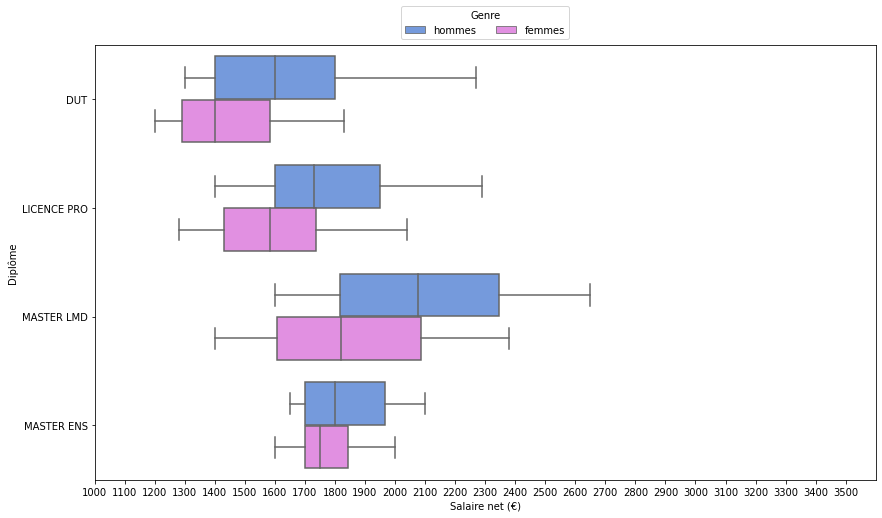

In [260]:
# Définition de la graduation des salaires
xticks = range(1000, 3600, 100)
# Création du boxplot des quartiles de salaires par diplôme selon le genre
plt.figure(figsize=(14,8))
sns.boxplot(
    data=df_quartiles_diplomes,
    y="Diplôme",
    x="salaire",
    hue_order=["hommes", "femmes"],
    hue="Genre",
    palette=["cornflowerblue", "violet"]
)
plt.xticks(xticks, [f"{int(x)}" for x in xticks])
# On limite la tranche des salaires entre 1000 et 4000 €
plt.xlim(1000, 3600)
plt.xlabel("Salaire net (€)")
plt.legend(loc='upper center', title='Genre', bbox_to_anchor=(0.5, 1.1), ncol=2)
plt.show()

In [261]:
# Suppression des ensembles pour ne garder que les disciplines propres
df_disciplines = ins_prof[select + ["Discipline", "situation"]].copy()
df_disciplines = df_disciplines[
    ~df_disciplines["Discipline"].str.contains(r"Ensemble|Autres", case=False) &
    ~df_disciplines["Genre"].str.contains(r"femmes et hommes") &
    (df_disciplines["situation"] == "18 mois après le diplôme") &
    (df_disciplines["Année"] > "2012")
    ]

In [262]:
df_disciplines["Discipline"].unique()

array(['Informatique', 'Information communication',
       'Sciences fondamentales', 'Sciences de la vie et de la terre',
       'Gestion', 'Droit', 'Lettres, langues, arts',
       'Histoire-géographie', 'Psychologie', 'Économie',
       "Sciences de l'ingénieur", 'Masters enseignement'], dtype=object)

In [263]:
df_quartiles_disciplines = df_disciplines.melt(
    id_vars=["Année", "Genre", "Diplôme", "Discipline"], 
    value_vars=[
        "Salaire net mensuel médian des emplois à temps plein",
        "Premier quartile des salaires nets mensuels des emplois à temps plein",
        "Dernier quartile des salaires nets mensuels des emplois à temps plein"
        ],
    var_name="quartile",
    value_name="salaire"
)

In [264]:
df_quartiles_disciplines

,Année,Genre,Diplôme,Discipline,quartile,salaire
0,2017,hommes,DUT,Informatique,Salaire net mensuel médian des emplois à temps...,1570.0
1,2017,femmes,DUT,Information communication,Salaire net mensuel médian des emplois à temps...,20300.0
2,2013,hommes,DUT,Information communication,Salaire net mensuel médian des emplois à temps...,0.0
3,2019,hommes,DUT,Information communication,Salaire net mensuel médian des emplois à temps...,1400.0
4,2014,hommes,DUT,Sciences fondamentales,Salaire net mensuel médian des emplois à temps...,0.0
...,...,...,...,...,...,...
2860,2018,hommes,MASTER LMD,Sciences de l'ingénieur,Dernier quartile des salaires nets mensuels de...,2350.0
2861,2019,hommes,MASTER LMD,Sciences de l'ingénieur,Dernier quartile des salaires nets mensuels de...,2450.0
2862,2017,hommes,MASTER ENS,Masters enseignement,Dernier quartile des salaires nets mensuels de...,1950.0
2863,2013,femmes,MASTER ENS,Masters enseignement,Dernier quartile des salaires nets mensuels de...,1780.0


In [265]:
# Suppression des salaires nuls
df_quartiles_disciplines = df_quartiles_disciplines.drop(
    df_quartiles_disciplines[df_quartiles_disciplines.loc[:, "salaire"] == 0].index
    )

In [266]:
# Tri par salaires médians
df_test = df_quartiles_disciplines.groupby(["Genre", "Discipline"])[["salaire"]].quantile([0.25, 0.5, 0.75])

In [267]:
median_femmes = df_test.loc["femmes", :, 0.50] 
median_hommes = df_test.loc["hommes", :, 0.50] 

In [268]:
# différence de salaire entre les hommes et les femmes dans chaque discipline
median_hommes - median_femmes

,salaire
Discipline,
Droit,160.0
Gestion,160.0
Histoire-géographie,60.0
Information communication,85.0
Informatique,-45.0
"Lettres, langues, arts",100.0
Masters enseignement,90.0
Psychologie,100.0
Sciences de l'ingénieur,75.0


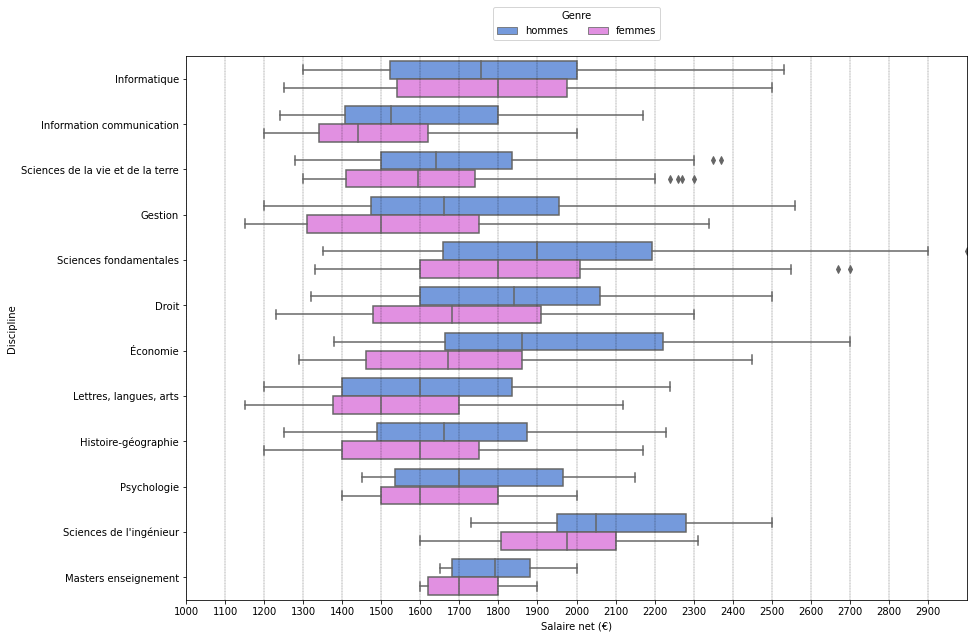

In [269]:
# Définition de la graduation des salaires
xticks = range(1000, 3000, 100)
# Création du boxplot des quartiles de salaires par discipline selon le genre
plt.figure(figsize=(14,10))
sns.boxplot(
    data=df_quartiles_disciplines,
    y="Discipline",
    x="salaire",
    hue_order=["hommes", "femmes"],
    hue="Genre",
    palette=["cornflowerblue", "violet"]
)
plt.gca().xaxis.grid(True, linestyle='--', which='both', linewidth=0.3, color='black')
plt.xticks(xticks, [f"{int(x)}" for x in xticks])
# On limite la tranche des salaires entre 1000 et 4000 €
plt.xlim(1000, 3000)
plt.xlabel("Salaire net (€)")
plt.legend(loc='upper center', title='Genre', bbox_to_anchor=(0.5, 1.1), ncol=2)
plt.show()

# Distribution des salaires  médians #

In [270]:
# Distribution des salaires
df_salaires_distribution = df_stat.groupby(["Salaire net mensuel médian des emplois à temps plein"])[["Nombre de réponses"]].sum()

In [271]:
df_salaires_distribution.sort_values("Salaire net mensuel médian des emplois à temps plein", ascending=False, inplace=True)
df_salaires_distribution.reset_index(inplace=True)

In [272]:
df_salaires_distribution.head()

,Salaire net mensuel médian des emplois à temps plein,Nombre de réponses
0,23100.0,826.0
1,2220.0,12995.0
2,2210.0,0.0
3,2200.0,12469.0
4,2160.0,12732.0


In [273]:
# Correction des salaires trop élevés
rows = df_salaires_distribution[
    df_salaires_distribution["Salaire net mensuel médian des emplois à temps plein"] > 20000].index
df_salaires_distribution.iloc[rows, 0] = df_salaires_distribution.iloc[rows, 0] / 10

# Suppression des salaires trop faibles
rows = df_salaires_distribution[
    df_salaires_distribution["Salaire net mensuel médian des emplois à temps plein"] < 1000].index
df_salaires_distribution.drop(rows, inplace=True)

In [274]:
df_salaires_distribution.head()

,Salaire net mensuel médian des emplois à temps plein,Nombre de réponses
0,2310.0,826.0
1,2220.0,12995.0
2,2210.0,0.0
3,2200.0,12469.0
4,2160.0,12732.0


In [275]:
# Proportion des salaires
total = df_salaires_distribution["Nombre de réponses"].sum()
df_salaires_distribution["%"] = df_salaires_distribution["Nombre de réponses"] / total * 100

In [276]:
df_salaires_distribution.head()

,Salaire net mensuel médian des emplois à temps plein,Nombre de réponses,%
0,2310.0,826.0,0.116151
1,2220.0,12995.0,1.827332
2,2210.0,0.0,0.000000
3,2200.0,12469.0,1.753367
4,2160.0,12732.0,1.790350


In [277]:
# Découpage par tranche de salaires
salaires_range = pd.cut(
    df_salaires_distribution["Salaire net mensuel médian des emplois à temps plein"], 
    bins=range(1200,3000,100), right=False)

df_salaires_distribution["Fourchette salaire"] = salaires_range

In [278]:
df_salaires_distribution.head()

,Salaire net mensuel médian des emplois à temps plein,Nombre de réponses,%,Fourchette salaire
0,2310.0,826.0,0.116151,"[2300, 2400)"
1,2220.0,12995.0,1.827332,"[2200, 2300)"
2,2210.0,0.0,0.000000,"[2200, 2300)"
3,2200.0,12469.0,1.753367,"[2200, 2300)"
4,2160.0,12732.0,1.790350,"[2100, 2200)"


In [279]:
# Calcul du nombre de diplômé par fouchette de salaires
df_graph_salaires = df_salaires_distribution.groupby("Fourchette salaire")[["Nombre de réponses"]].sum()

# Renomage des fouchettes

df_graph_salaires.reset_index(inplace=True)

In [280]:
df_graph_salaires

,Fourchette salaire,Nombre de réponses
0,"[1200, 1300)",0.0
1,"[1300, 1400)",2499.0
2,"[1400, 1500)",27349.0
3,"[1500, 1600)",59139.0
4,"[1600, 1700)",93221.0
5,"[1700, 1800)",175637.0
6,"[1800, 1900)",140276.0
7,"[1900, 2000)",80556.0
8,"[2000, 2100)",67913.0
9,"[2100, 2200)",38266.0


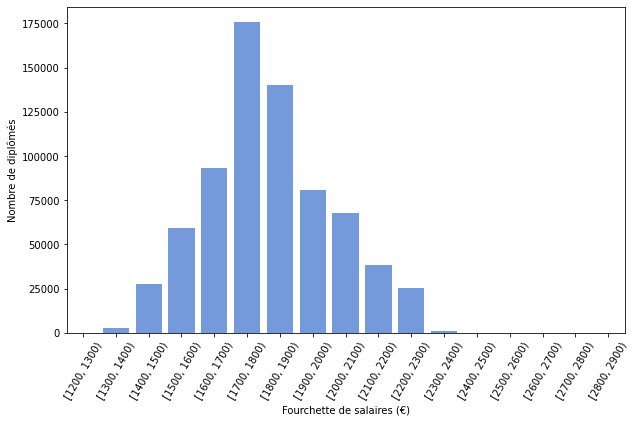

In [281]:
# Distribution des salaires par trange de 100 €
fig, ax = plt.subplots(figsize=(10,6))
sns.barplot(
    data=df_graph_salaires,
    x="Fourchette salaire",
    y="Nombre de réponses",
    errorbar=None,
    palette=["cornflowerblue"],
    ax=ax
)
ax.set_xlabel("Fourchette de salaires (€)")
ax.set_ylabel("Nombre de diplômés")
ax.set_xticklabels(ax.get_xticklabels(),rotation=60)
plt.show()

# Proportion des disciplines #

In [282]:
df_distrib_disciplines = ins_prof[select + ["Discipline", "situation"]]
df_distrib_disciplines = df_distrib_disciplines[
    ~df_distrib_disciplines["Discipline"].str.contains(r"Ensemble|Autres", case=False) &
    ~df_distrib_disciplines["Genre"].str.contains(r"femmes et hommes") &
    #(df_distrib_disciplines["situation"] == "30 mois après le diplôme") &
    (df_distrib_disciplines["Année"] > "2012")
    ]

In [283]:
# Nombre de diplômés par disciplines selon le genre
df_distrib_discipline = df_distrib_disciplines.groupby(["Genre", "Diplôme", "Discipline"])[["Nombre de réponses"]].sum()
total = df_distrib_discipline["Nombre de réponses"].sum()
df_distrib_discipline["%"] = df_distrib_discipline["Nombre de réponses"] / total * 100
df_distrib_discipline.sort_values("%", ascending=False, inplace=True)
df_distrib_discipline.reset_index(inplace=True)

In [284]:
df_distrib_discipline.head()

,Genre,Diplôme,Discipline,Nombre de réponses,%
0,femmes,MASTER ENS,Masters enseignement,56912.0,9.601512
1,femmes,MASTER LMD,"Lettres, langues, arts",53536.0,9.031953
2,femmes,MASTER LMD,Gestion,46924.0,7.916456
3,hommes,MASTER LMD,Gestion,35956.0,6.066066
4,femmes,LICENCE PRO,Gestion,31946.0,5.389547


In [285]:
df_distrib_discipline.groupby(["Genre", "Discipline"])[["Nombre de réponses", "%"]].sum().sort_values(["Genre", "%"], ascending=False)

Nombre de réponses          %
Genre  Discipline                                                      
hommes Gestion                                       59674.0  10.067483
       Informatique                                  33584.0   5.665891
       Sciences de la vie et de la terre             25126.0   4.238958
       Sciences de l'ingénieur                       19770.0   3.335358
       Lettres, langues, arts                        16652.0   2.809326
       Masters enseignement                          16400.0   2.766812
       Sciences fondamentales                        16338.0   2.756352
       Droit                                         13818.0   2.331208
       Économie                                      11840.0   1.997503
       Information communication                      9758.0   1.646253
       Histoire-géographie                            7180.0   1.211324
       Psychologie                                    2236.0   0.377231
femmes Gestion                                       83264.0  14.047306
       Lettres, langues, arts                        58158.0   9.811722
       Masters enseignement                          56912.0   9.601512
       Sciences de la vie et de la terre             40958.0   6.909944
       Droit                                         31676.0   5.343996
       Information communication                     20006.0   3.375173
       Sciences fondamentales                        16264.0   2.743867
       Psychologie                                   15898.0   2.682120
       Économie                                      15334.0   2.586969
       Histoire-géographie                           11228.0   1.894254
       Sciences de l'ingénieur                        5928.0   1.000101
       Informatique                                   4738.0   0.799339

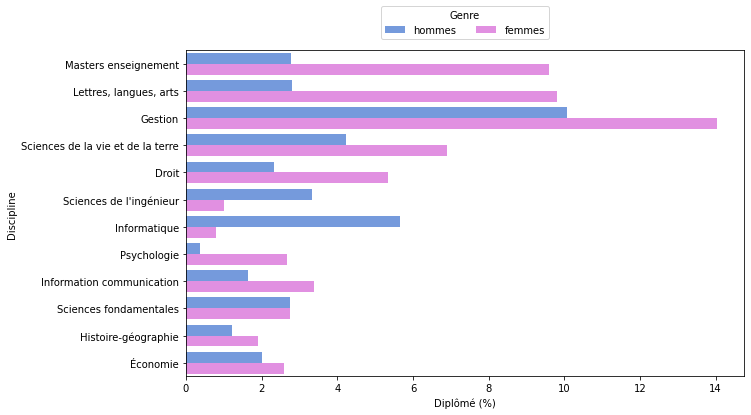

In [286]:
fig, ax = plt.subplots(figsize=(10, 6))
sns.barplot(
    data=df_distrib_discipline,
    y="Discipline",
    x="%",
    hue_order=["hommes", 'femmes'],
    hue="Genre",
    errorbar=None,
    palette=["cornflowerblue", "violet"],
    estimator="sum",
    ax=ax
)
ax.set_xlabel("Diplômé (%)")
plt.legend(loc='upper center', title='Genre', bbox_to_anchor=(0.5, 1.15), ncol=2)
plt.show()

## Taux d'insertion par dipôme ##

In [287]:
# Nombre de valeurs manquantes du taux d'insertion par genre
test_na = df_stat_na["Taux d’insertion"].isna()
df_na = df_stat_na[test_na][["Genre", "Diplôme", "Taux d’insertion"]]
df_na["Taux d’insertion"] = True
df_taux_na = df_na.groupby(["Genre", "Diplôme"])["Taux d’insertion"].count()
df_taux_na.name= "NA"
df_taux_na = pd.DataFrame(df_taux_na)

In [288]:
# Taux de valeurs manquantes du taux d'insertion par genre
total = df_na.shape[0]
df_taux_na["% NA"] = round(df_taux_na["NA"] / total * 100)

In [289]:
df_taux_na

NA  % NA
Genre            Diplôme               
femmes           DUT          227  16.0
                 LICENCE PRO  172  12.0
                 MASTER LMD   151  11.0
femmes et hommes DUT           79   6.0
                 LICENCE PRO  130   9.0
                 MASTER LMD    80   6.0
hommes           DUT          128   9.0
                 LICENCE PRO  239  17.0
                 MASTER LMD   198  14.0

In [290]:
# Selection par diplôme selon la situation
df_stat = ins_prof[selection]
df_stat = df_stat[
    (df_stat.loc[:, "Discipline"].str.contains(r"Ensemble des départements|Ensemble Licence professionnelle|Ensemble Masters LMD|^Masters enseignement")) &
    (df_stat.loc[:, "Genre"].str.contains(r"^femmes et hommes")) &
    (df_stat["Année"] > '2012')]
df_stat.sort_values(["Année", "Diplôme"], inplace=True)

In [291]:
# Suppression des taux d'insertions non significatifs
df_insertion = df_stat.drop(df_stat[df_stat["Taux d’insertion"] == 0].index)

# Nombre de diplômés insérés par rapport au taux d'insertion
df_insertion["Diplômé inséré"] = round(df_insertion["Nombre de réponses"] * df_insertion["Taux d’insertion"] / 100)

# Nombre de diplômés insérés par année et diplôme
df_insertion = df_insertion.groupby(["Année", "Diplôme", "Discipline", "situation"])[["Nombre de réponses", "Diplômé inséré"]].sum()

# Pourcentage de diplômés insérés par année selon le diplôme
df_insertion["% diplômé inséré"] = round(df_insertion["Diplômé inséré"] / df_insertion["Nombre de réponses"] * 100)

In [292]:
df_insertion

Nombre de réponses  \
Année Diplôme     Discipline                                       situation                                      
2013  DUT         Ensemble des départements d''IUT                 18 mois après le diplôme              2054.0   
                                                                   30 mois après le diplôme              2054.0   
                  Ensemble des départements d'IUT                  18 mois après le diplôme               850.0   
                                                                   30 mois après le diplôme               850.0   
      LICENCE PRO Ensemble Licence professionnelle                 18 mois après le diplôme             16625.0   
...                                                                                                         ...   
2019  LICENCE PRO Ensemble des départements d'IUT                  30 mois après le diplôme              7544.0   
      MASTER ENS  Masters enseignement                             18 mois après le diplôme              5912.0   
                                                                   30 mois après le diplôme              5912.0   
      MASTER LMD  Ensemble Masters LMD (hors Masters enseignement) 18 mois après le diplôme             31616.0   
                                                                   30 mois après le diplôme             31616.0   

                                                                                             Diplômé inséré  \
Année Diplôme     Discipline                                       situation                                  
2013  DUT         Ensemble des départements d''IUT                 18 mois après le diplôme          1664.0   
                                                                   30 mois après le diplôme          1849.0   
                  Ensemble des départements d'IUT                  18 mois après le diplôme           714.0   
                                                                   30 mois après le diplôme           781.0   
      LICENCE PRO Ensemble Licence professionnelle                 18 mois après le diplôme         14630.0   
...                                                                                                     ...   
2019  LICENCE PRO Ensemble des départements d'IUT                  30 mois après le diplôme          7183.0   
      MASTER ENS  Masters enseignement                             18 mois après le diplôme          5794.0   
                                                                   30 mois après le diplôme          5794.0   
      MASTER LMD  Ensemble Masters LMD (hors Masters enseignement) 18 mois après le diplôme         27506.0   
                                                                   30 mois après le diplôme         29403.0   

                                                                                             % diplômé inséré  
Année Diplôme     Discipline                                       situation                                   
2013  DUT         Ensemble des départements d''IUT                 18 mois après le diplôme              81.0  
                                                                   30 mois après le diplôme              90.0  
                  Ensemble des départements d'IUT                  18 mois après le diplôme              84.0  
                                                                   30 mois après le diplôme              92.0  
      LICENCE PRO Ensemble Licence professionnelle                 18 mois après le diplôme              88.0  
...                                                                                                       ...  
2019  LICENCE PRO Ensemble des départements d'IUT                  30 mois après le diplôme              95.0  
      MASTER ENS  Masters enseignement                             18 mois après le diplôme              98.0  
                                 

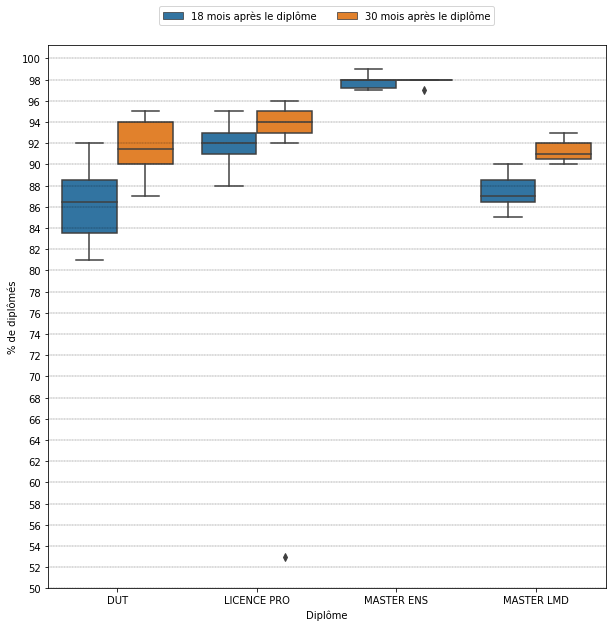

In [293]:
fig, ax = plt.subplots(figsize=(10,10))
yticks = range(50, 101, 2)
sns.boxplot(
    data=df_insertion.reset_index(),
    x="Diplôme",
    y="% diplômé inséré",
    hue="situation",
    ax=ax
)
plt.gca().yaxis.grid(True, linestyle='--', which='both', linewidth=0.3, color='black')
plt.ylabel("% de diplômés")
plt.yticks(yticks, [f"{int(x)}" for x in yticks])
plt.legend(loc='upper center', title='', bbox_to_anchor=(0.5, 1.08), ncol=3)
plt.show()

In [294]:
# Selection par diplôme selon la situation
df_stat = ins_prof[selection]
df_stat = df_stat[
    (~df_stat.loc[:, "Discipline"].str.contains(r"Ensemble|^Masters enseignement|Autres")) &
    (df_stat.loc[:, "Genre"].str.contains(r"^femmes et hommes")) &
    (df_stat["Année"] > '2012')]
df_stat.sort_values(["Année", "Diplôme"], inplace=True)

In [295]:
# Suppression des taux d'insertions non significatifs
df_insertion = df_stat.drop(df_stat[df_stat["Taux d’insertion"] == 0].index)

# Nombre de diplômés insérés par rapport au taux d'insertion
df_insertion["Diplômé inséré"] = round(df_insertion["Nombre de réponses"] * df_insertion["Taux d’insertion"] / 100)

# Nombre de diplômés insérés par année et diplôme
df_insertion = df_insertion.groupby(["Année", "Diplôme", "Discipline", "situation"])[["Nombre de réponses", "Diplômé inséré"]].sum()

# Pourcentage de diplômés insérés par année selon le diplôme
df_insertion["% diplômé inséré"] = round(df_insertion["Diplômé inséré"] / df_insertion["Nombre de réponses"] * 100)

In [296]:
df_insertion.head(20)

Nombre de réponses  \
Année Diplôme     Discipline                        situation                                      
2013  DUT         Gestion                           18 mois après le diplôme              1387.0   
                                                    30 mois après le diplôme              1387.0   
                  Information communication         18 mois après le diplôme               440.0   
                                                    30 mois après le diplôme               440.0   
                  Informatique                      18 mois après le diplôme               308.0   
                                                    30 mois après le diplôme               308.0   
                  Sciences de la vie et de la terre 18 mois après le diplôme               406.0   
                                                    30 mois après le diplôme               406.0   
                  Sciences fondamentales            18 mois après le diplôme               272.0   
                                                    30 mois après le diplôme               272.0   
      LICENCE PRO Droit                             18 mois après le diplôme               406.0   
                                                    30 mois après le diplôme               406.0   
                  Gestion                           18 mois après le diplôme              4113.0   
                                                    30 mois après le diplôme              4113.0   
                  Histoire-géographie               18 mois après le diplôme                43.0   
                                                    30 mois après le diplôme                43.0   
                  Information communication         18 mois après le diplôme               855.0   
                                                    30 mois après le diplôme               855.0   
                  Informatique                      18 mois après le diplôme              1548.0   
                                                    30 mois après le diplôme              1548.0   

                                                                              Diplômé inséré  \
Année Diplôme     Discipline                        situation                                  
2013  DUT         Gestion                           18 mois après le diplôme          1095.0   
                                                    30 mois après le diplôme          1250.0   
                  Information communication         18 mois après le diplôme           347.0   
                                                    30 mois après le diplôme           379.0   
                  Informatique                      18 mois après le diplôme           259.0   
                                                    30 mois après le diplôme           276.0   
                  Sciences de la vie et de la terre 18 mois après le diplôme           357.0   
                                                    30 mois après le diplôme           382.0   
                  Sciences fondamentales            18 mois après le diplôme           214.0   
                                                    30 mois après le diplôme           230.0   
      LICENCE PRO Droit                             18 mois après le diplôme           361.0   
                                                    30 mois après le diplôme           378.0   
                  Gestion                           18 mois après le diplôme          3702.0   
                                                    30 mois après le diplôme          3825.0   
                  Histoire-géographie               18 mois après le diplôme            37.0   
                                                    30 mois après le diplôme            40.0   
                  Information communication         18 mois après le diplôme           693.0   
                                                    3

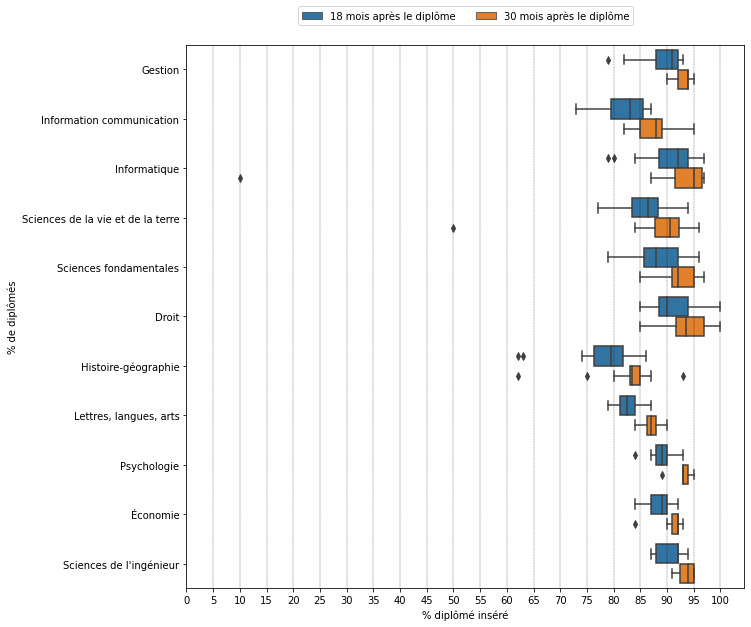

In [297]:
fig, ax = plt.subplots(figsize=(10,10))
xticks = range(0, 101, 5)
sns.boxplot(
    data=df_insertion.reset_index(),
    x="% diplômé inséré",
    y="Discipline",
    hue="situation",
    ax=ax
)
plt.gca().xaxis.grid(True, linestyle='--', which='both', linewidth=0.3, color='black')
plt.ylabel("% de diplômés")
plt.xticks(xticks, [f"{int(x)}" for x in xticks])
plt.legend(loc='upper center', title='', bbox_to_anchor=(0.5, 1.08), ncol=3)
plt.show()